## Mini Project 1

UK Train Rides
Mock train ticket data for National Rail in the UK, from Jan to Apr 2024, including details on the type of ticket, the date & time for each journey, the departure & arrival stations, the ticket price, and more.

Analysis

What are the most popular routes?

What are the contributing factors for train disruptions

How does revenue vary by ticket types?

# Attribute Information 
Railway Info

1 - Transaction ID : Unique identifier for an individual train ticket purchase

2 - Date of Purchase : Date the ticket was purchased (datetime)

3 - Time of Purchase : Time the ticket was purchased (datetime)

4 - Purchase Type : Whether the ticket was purchased online or directly at a train station

5 - Payment Method : Payment method used to purchase the ticket (Contactles Credit Card or Debit Card)

6 - Railcard : Whether the passenger is a National Railcard holder (Adult Senior or Disabled) or not (None). Railcard holders get 1/3 off their ticket purchases

7 - Ticket Class : Seat class for the ticket (Standard or First)

8 - Ticket Type : 	When you bought or can use the ticket. Advance tickets are 1/2 off and must be purchased at least a day prior to departure. Off-Peak tickets are 1/4 off and must be used outside of peak hours (weekdays between 6-8am and 4-6pm). Anytime tickets are full price and can be bought and used at any time during the day.
 
9 - Price : The cost of a train ticket in pounds (int)

10 - Departure Station : Station to board the train

11 - Arrival Destination : Station to exit the train

12 - Date of Journey : Date the train departed (datetime)

13 - Departure Time : Time the train departed (datetime)
 
14 - Arrival Time : Time the train was scheduled to arrive at its destination (can be on the day after departure) (datetime)

15 - Actual Arrival : Time the train arrived at its destination (can be on the day after departure) (datetime)

16 - Journey Status : whether the train arrived ('On Time', 'Cancelled', 'Delayed') 

17 Reason for Delay : why train was delayed ('Staffing', 'Weather', 'Signal failure', 'Staff Shortage', 'Technical Issue', 'Traffic')

18 Refund Request : Whether the passenger requested a refund after a delay or cancellation (binary: 'yes', 'no') convert to numeric 0 = no 1 = yes

## Loading Modules

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime 

# Data cleaning

In [7]:
dfTrainData = pd.read_csv('railway.csv')

In [8]:
# Check the first 10 rows of the dataset
dfTrainData.head(10)

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,NaN,No
5,4e1dcd88-3d95-44ef-99fa,2023-12-30,07:56:06,Online,Credit Card,NaN,Standard,Advance,35,London Kings Cross,York,2024-01-01,06:15:00,08:05:00,08:05:00,On Time,NaN,No
6,1c74479d-85a4-4ba1-a607,2023-12-31,00:02:01,Station,Credit Card,Adult,Standard,Advance,2,London Euston,Oxford,2024-01-01,22:30:00,23:40:00,23:40:00,On Time,NaN,No
7,febf8dab-f808-46fa-bf2b,2023-12-31,01:35:18,Station,Contactless,Disabled,Standard,Advance,2,Liverpool Lime Street,Manchester Piccadilly,2024-01-01,00:00:00,00:30:00,00:30:00,On Time,NaN,No
8,01df916f-4291-41ec-a37d,2023-12-31,01:43:09,Station,Credit Card,NaN,Standard,Advance,37,London Euston,York,2024-01-01,00:00:00,01:50:00,02:07:00,Delayed,Signal Failure,No
9,a8cedba7-1923-459d-b046,2023-12-31,03:05:52,Online,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01,01:30:00,02:30:00,02:30:00,On Time,NaN,No


In [9]:
# look at sample of the dataset
# to have a better understanding of the NaN values in Railcard, Actual Arrival Time, and Reason for Delay
dfTrainData.sample(20)

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
11519,d89d4c0a-39c8-4209-9879,2024-02-08,09:01:43,Station,Contactless,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-02-08,10:30:00,11:50:00,11:50:00,On Time,NaN,No
19859,5a933e79-e1e2-4085-842b,2024-03-16,15:59:15,Station,Credit Card,Adult,Standard,Advance,2,Manchester Piccadilly,Liverpool Lime Street,2024-03-17,14:15:00,14:45:00,14:45:00,On Time,NaN,No
2057,dad31126-d228-44a1-a979,2024-01-09,07:18:33,Online,Contactless,NaN,Standard,Anytime,25,London Paddington,Reading,2024-01-09,08:45:00,09:45:00,09:45:00,On Time,NaN,No
16378,063e09a7-4b4b-42ce-a705,2024-03-03,19:41:04,Station,Credit Card,Adult,Standard,Advance,4,London Euston,Birmingham New Street,2024-03-04,17:45:00,19:05:00,19:05:00,On Time,NaN,No
3374,4e88b038-e2b8-4a29-88d8,2024-01-14,06:14:17,Station,Contactless,NaN,Standard,Advance,8,London St Pancras,Birmingham New Street,2024-01-15,04:30:00,05:50:00,NaN,Cancelled,Staffing,No
24434,660341cb-8afd-4e7f-85af,2024-04-03,17:27:27,Online,Contactless,NaN,Standard,Advance,3,Manchester Piccadilly,Liverpool Lime Street,2024-04-04,15:45:00,16:15:00,16:15:00,On Time,NaN,No
12658,d1bdcad4-4c83-4bfe-94f8,2024-02-11,09:58:34,Station,Credit Card,Disabled,Standard,Advance,4,London Euston,Birmingham New Street,2024-02-12,08:15:00,09:35:00,09:35:00,On Time,NaN,No
6852,c9409478-8302-4f45-9778,2024-01-26,08:15:39,Station,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-02-10,06:45:00,07:15:00,07:15:00,On Time,NaN,No
27351,98e3f232-0281-4e0d-8975,2024-04-14,15:55:32,Online,Credit Card,Senior,Standard,Advance,11,Oxford,Bristol Temple Meads,2024-04-15,14:15:00,15:30:00,16:02:00,Delayed,Signal Failure,Yes
23208,c277e960-a631-4958-9cc9,2024-03-29,02:49:48,Station,Contactless,NaN,Standard,Off-Peak,5,Liverpool Lime Street,Manchester Piccadilly,2024-03-29,04:15:00,04:45:00,04:45:00,On Time,NaN,No


In [10]:
# check the total rows and columns of the dataset
dfTrainData.shape

(31653, 18)

In [11]:
dfTrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             10735 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey Status       31653 non-null  object
 16  Reas

In [12]:
dfTrainData.columns

Index(['Transaction ID', 'Date of Purchase', 'Time of Purchase',
       'Purchase Type', 'Payment Method', 'Railcard', 'Ticket Class',
       'Ticket Type', 'Price', 'Departure Station', 'Arrival Destination',
       'Date of Journey', 'Departure Time', 'Arrival Time',
       'Actual Arrival Time', 'Journey Status', 'Reason for Delay',
       'Refund Request'],
      dtype='object')

In [13]:
# # Replace lower case values in columns to follow the camel case style
# dfTrainData.columns = [col. replace('of', 'Of').replace('for', 'For')
#                        for col in dfTrainData.columns] 
# dfTrainData.columns

In [14]:
# # create a function that converts the columns into camelCase
# def toCamelCase(string):
#     words = string.split()  
#     return words[0].lower() + ''.join(word.capitalize() for word in words[1:])

# dfTrainData.columns = [toCamelCase(col) for col in dfTrainData.columns]
# dfTrainData

In [15]:
# Check how many NaN values are in the dataset 
dfTrainData.isna().sum()

Transaction ID             0
Date of Purchase           0
Time of Purchase           0
Purchase Type              0
Payment Method             0
Railcard               20918
Ticket Class               0
Ticket Type                0
Price                      0
Departure Station          0
Arrival Destination        0
Date of Journey            0
Departure Time             0
Arrival Time               0
Actual Arrival Time     1880
Journey Status             0
Reason for Delay       27481
Refund Request             0
dtype: int64

In [16]:
dfTrainData.duplicated().sum()

0

In [17]:
# Capitalize 'O' in the columns Date of Purchase, Time of Purchase & Date of Journey


In [18]:
# Replace the white spaces of the columns with underscore
dfTrainData.columns = dfTrainData.columns.str.replace(' ', '_')

In [19]:
# Replace the white spaces in the columns with an underscore
# create a variable for the selected columns
columnSpace = ['Payment_Method', 'Ticket_Class', 'Departure_Station', 'Arrival_Destination', 'Reason_for_Delay', 'Journey_Status']

In [20]:
dfTrainData[columnSpace] = dfTrainData[columnSpace].apply(lambda x: x.str.replace(' ', '_'))

In [21]:
dfTrainData[columnSpace].head()

,Payment_Method,Ticket_Class,Departure_Station,Arrival_Destination,Reason_for_Delay,Journey_Status
0,Contactless,Standard,London_Paddington,Liverpool_Lime_Street,NaN,On_Time
1,Credit_Card,Standard,London_Kings_Cross,York,Signal_Failure,Delayed
2,Credit_Card,Standard,Liverpool_Lime_Street,Manchester_Piccadilly,NaN,On_Time
3,Credit_Card,Standard,London_Paddington,Reading,NaN,On_Time
4,Contactless,Standard,Liverpool_Lime_Street,London_Euston,NaN,On_Time


In [22]:
# Drop the Railcard column
# Reasoning: over half of the column values are NaN
# df_Copy.drop(['Railcard'], axis=1, inplace=True)
# After looking at the missing values in the Railcard column, decided to not drop the column but replace the missing values with 'None'
dfTrainData['Railcard'] = dfTrainData['Railcard'].fillna('None')

In [23]:
dfTrainData.head()

,Transaction_ID,Date_of_Purchase,Time_of_Purchase,Purchase_Type,Payment_Method,Railcard,Ticket_Class,Ticket_Type,Price,Departure_Station,Arrival_Destination,Date_of_Journey,Departure_Time,Arrival_Time,Actual_Arrival_Time,Journey_Status,Reason_for_Delay,Refund_Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London_Paddington,Liverpool_Lime_Street,2024-01-01,11:00:00,13:30:00,13:30:00,On_Time,NaN,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit_Card,Adult,Standard,Advance,23,London_Kings_Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal_Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit_Card,None,Standard,Advance,3,Liverpool_Lime_Street,Manchester_Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On_Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit_Card,None,Standard,Advance,13,London_Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On_Time,NaN,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,None,Standard,Advance,76,Liverpool_Lime_Street,London_Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On_Time,NaN,No


In [24]:
# Replace the NaN values in the column Actual_Arrival_Time with (Train_Cancelled) 
dfTrainData['Actual_Arrival_Time'] = dfTrainData['Actual_Arrival_Time'].fillna('Train_Cancelled')

In [25]:
dfTrainData['Actual_Arrival_Time'].value_counts()

Actual_Arrival_Time
Train_Cancelled    1880
19:05:00           1013
07:50:00            787
20:05:00            707
19:45:00            559
                   ... 
02:36:00              1
07:58:00              1
05:51:00              1
17:17:00              1
04:06:00              1
Name: count, Length: 624, dtype: int64

In [26]:
# Check to see if the NaN values have been filled for Actual_Arrival_Time
dfTrainData.isna().sum()

Transaction_ID             0
Date_of_Purchase           0
Time_of_Purchase           0
Purchase_Type              0
Payment_Method             0
Railcard                   0
Ticket_Class               0
Ticket_Type                0
Price                      0
Departure_Station          0
Arrival_Destination        0
Date_of_Journey            0
Departure_Time             0
Arrival_Time               0
Actual_Arrival_Time        0
Journey_Status             0
Reason_for_Delay       27481
Refund_Request             0
dtype: int64

In [27]:
# Fill the NaN values in the Reason_for_Delay column with (No_Delay)
# Reasoning: the trains arrived therefore no reason for delay
dfTrainData['Reason_for_Delay'] = dfTrainData['Reason_for_Delay'].fillna('No_Delay')

In [28]:
# Check that the NaN values have all been replaced with values
dfTrainData.isna().sum()

Transaction_ID         0
Date_of_Purchase       0
Time_of_Purchase       0
Purchase_Type          0
Payment_Method         0
Railcard               0
Ticket_Class           0
Ticket_Type            0
Price                  0
Departure_Station      0
Arrival_Destination    0
Date_of_Journey        0
Departure_Time         0
Arrival_Time           0
Actual_Arrival_Time    0
Journey_Status         0
Reason_for_Delay       0
Refund_Request         0
dtype: int64

In [29]:
dfTrainData.nunique()

Transaction_ID         31653
Date_of_Purchase         128
Time_of_Purchase       24351
Purchase_Type              2
Payment_Method             3
Railcard                   4
Ticket_Class               2
Ticket_Type                3
Price                    125
Departure_Station         12
Arrival_Destination       32
Date_of_Journey          121
Departure_Time            96
Arrival_Time             203
Actual_Arrival_Time      624
Journey_Status             3
Reason_for_Delay           9
Refund_Request             2
dtype: int64

In [30]:
# Look at the data types of the dataset
# Convert the time sensitive columns using pd.to_datetime
# Convert Refund Request into a boolean as the values are Yes : No

dfTrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction_ID       31653 non-null  object
 1   Date_of_Purchase     31653 non-null  object
 2   Time_of_Purchase     31653 non-null  object
 3   Purchase_Type        31653 non-null  object
 4   Payment_Method       31653 non-null  object
 5   Railcard             31653 non-null  object
 6   Ticket_Class         31653 non-null  object
 7   Ticket_Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure_Station    31653 non-null  object
 10  Arrival_Destination  31653 non-null  object
 11  Date_of_Journey      31653 non-null  object
 12  Departure_Time       31653 non-null  object
 13  Arrival_Time         31653 non-null  object
 14  Actual_Arrival_Time  31653 non-null  object
 15  Journey_Status       31653 non-null  object
 16  Reas

In [31]:
# Create a variable dateTime for the group of columns to be converted to datetime  
# dt_Columns = ['Date_of_Purchase', 'Time_of_Purchase', 'Date_of_Journey', 'Departure_Time', 'Arrival_Time', 'Actual_Arrival_Time']
dateTime = ['Date_of_Purchase', 'Date_of_Journey']

In [32]:
dfTrainData[dateTime] = dfTrainData[dateTime].apply(pd.to_datetime, errors='coerce')

In [33]:
# Confirm the data types have been converted
dfTrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Transaction_ID       31653 non-null  object        
 1   Date_of_Purchase     31653 non-null  datetime64[ns]
 2   Time_of_Purchase     31653 non-null  object        
 3   Purchase_Type        31653 non-null  object        
 4   Payment_Method       31653 non-null  object        
 5   Railcard             31653 non-null  object        
 6   Ticket_Class         31653 non-null  object        
 7   Ticket_Type          31653 non-null  object        
 8   Price                31653 non-null  int64         
 9   Departure_Station    31653 non-null  object        
 10  Arrival_Destination  31653 non-null  object        
 11  Date_of_Journey      31653 non-null  datetime64[ns]
 12  Departure_Time       31653 non-null  object        
 13  Arrival_Time         31653 non-

In [34]:
# Error message solution
pd.set_option('future.no_silent_downcasting', True)

In [35]:
# Check the values of Refund_Request
dfTrainData['Refund_Request'].value_counts()

Refund_Request
No     30535
Yes     1118
Name: count, dtype: int64

In [36]:
# Convert the Refeund_Request column values into a binary value 0 = No : 1 = Yes
dfTrainData.replace({'Refund_Request': {'No': 0, 'Yes': 1}}, inplace=True)

In [37]:
# Confirm that Refund_Request values has been converted into an integer
dfTrainData['Refund_Request'].value_counts()

Refund_Request
0    30535
1     1118
Name: count, dtype: int64

In [38]:
# Check the values of Purchase_Type column 
# dfTrainData['Purchase_Type'].value_counts()

In [39]:
# Convert the Purchase_Type column values into a binary value 0 = No : 1 = Yes
# df_Copy.replace({'Purchase_Type': {'Online': 0, 'Station': 1}}, inplace=True)

In [40]:
dfTrainData['Purchase_Type'].value_counts()

Purchase_Type
Online     18521
Station    13132
Name: count, dtype: int64

In [41]:
dfTrainData['Payment_Method'].value_counts()

Payment_Method
Credit_Card    19136
Contactless    10834
Debit_Card      1683
Name: count, dtype: int64

In [42]:
# Convert categorical columns into category data types using a for loop
# Not sure if it's necessary to conver these columns into categorical data aside from 'Reason_for_Delay'
# category_Columns = ['Ticket_Type', 'Departure_Station', 'Arrival_Destination', 'Journey_Status', 'Reason_for_Delay']
# for col in category_Columns:
#     df_Copy[col] = df_Copy[col].astype('category')

In [43]:
# Convert integer columns into int data types using a for loop
int_column = ['Refund_Request']
for col in int_column:
    dfTrainData[col] = dfTrainData[col].astype('int64')

In [44]:
# Confirm that category and int columns have been converted
dfTrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Transaction_ID       31653 non-null  object        
 1   Date_of_Purchase     31653 non-null  datetime64[ns]
 2   Time_of_Purchase     31653 non-null  object        
 3   Purchase_Type        31653 non-null  object        
 4   Payment_Method       31653 non-null  object        
 5   Railcard             31653 non-null  object        
 6   Ticket_Class         31653 non-null  object        
 7   Ticket_Type          31653 non-null  object        
 8   Price                31653 non-null  int64         
 9   Departure_Station    31653 non-null  object        
 10  Arrival_Destination  31653 non-null  object        
 11  Date_of_Journey      31653 non-null  datetime64[ns]
 12  Departure_Time       31653 non-null  object        
 13  Arrival_Time         31653 non-

In [45]:
dfTrainData['Refund_Request'].value_counts()

Refund_Request
0    30535
1     1118
Name: count, dtype: int64

In [46]:
dfTrainData['Railcard'].value_counts()

Railcard
None        20918
Adult        4846
Disabled     3089
Senior       2800
Name: count, dtype: int64

In [47]:
# Merge the duplicate values, Staff_Failure & Staff_failure and values that have similar meanings i.e Weather & Weather_Conditions
dfTrainData['Reason_for_Delay'].value_counts()

Reason_for_Delay
No_Delay              27481
Weather                 995
Technical_Issue         707
Signal_Failure          523
Signal_failure          447
Staffing                410
Staff_Shortage          399
Weather_Conditions      377
Traffic                 314
Name: count, dtype: int64

In [48]:
dfTrainData['Reason_for_Delay'] = dfTrainData['Reason_for_Delay'].replace(
    'Signal_failure', 'Signal_Failure')
dfTrainData['Reason_for_Delay'] = dfTrainData['Reason_for_Delay'].replace(
    ['Staff_Shortage', 'Staffing'], 'Staff_Issue')
dfTrainData['Reason_for_Delay'] = dfTrainData['Reason_for_Delay'].replace(
    'Weather_Conditions', 'Weather')
dfTrainData['Reason_for_Delay'] = dfTrainData['Reason_for_Delay'].replace(
    'Signal_Failure', 'Technical_Issue')

dfTrainData['Reason_for_Delay'].value_counts()

Reason_for_Delay
No_Delay           27481
Technical_Issue     1677
Weather             1372
Staff_Issue          809
Traffic              314
Name: count, dtype: int64

In [49]:
# Look at the summary statistics for the numeric values
dfTrainData.describe()

,Date_of_Purchase,Price,Date_of_Journey,Refund_Request
count,31653,31653.000000,31653,31653.000000
mean,2024-02-28 16:16:36.303667968,23.439200,2024-03-01 08:01:10.969576192,0.035321
min,2023-12-08 00:00:00,1.000000,2024-01-01 00:00:00,0.000000
25%,2024-01-30 00:00:00,5.000000,2024-01-31 00:00:00,0.000000
50%,2024-03-01 00:00:00,11.000000,2024-03-01 00:00:00,0.000000
75%,2024-03-31 00:00:00,35.000000,2024-03-31 00:00:00,0.000000
max,2024-04-30 00:00:00,267.000000,2024-04-30 00:00:00,1.000000
std,NaN,29.997628,NaN,0.184592


In [50]:
dfTrainData.head()

,Transaction_ID,Date_of_Purchase,Time_of_Purchase,Purchase_Type,Payment_Method,Railcard,Ticket_Class,Ticket_Type,Price,Departure_Station,Arrival_Destination,Date_of_Journey,Departure_Time,Arrival_Time,Actual_Arrival_Time,Journey_Status,Reason_for_Delay,Refund_Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London_Paddington,Liverpool_Lime_Street,2024-01-01,11:00:00,13:30:00,13:30:00,On_Time,No_Delay,0
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit_Card,Adult,Standard,Advance,23,London_Kings_Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Technical_Issue,0
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit_Card,None,Standard,Advance,3,Liverpool_Lime_Street,Manchester_Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On_Time,No_Delay,0
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit_Card,None,Standard,Advance,13,London_Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On_Time,No_Delay,0
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,None,Standard,Advance,76,Liverpool_Lime_Street,London_Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On_Time,No_Delay,0


In [51]:
dfTrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Transaction_ID       31653 non-null  object        
 1   Date_of_Purchase     31653 non-null  datetime64[ns]
 2   Time_of_Purchase     31653 non-null  object        
 3   Purchase_Type        31653 non-null  object        
 4   Payment_Method       31653 non-null  object        
 5   Railcard             31653 non-null  object        
 6   Ticket_Class         31653 non-null  object        
 7   Ticket_Type          31653 non-null  object        
 8   Price                31653 non-null  int64         
 9   Departure_Station    31653 non-null  object        
 10  Arrival_Destination  31653 non-null  object        
 11  Date_of_Journey      31653 non-null  datetime64[ns]
 12  Departure_Time       31653 non-null  object        
 13  Arrival_Time         31653 non-

In [52]:
# Plot a pairplot to see if there is any relationship between each numeric variables
# plt.figure(figsize= (8,6))
# sns.scatterplot(data=dfTrainData, x=dfTrainData['Price'], y=dfTrainData, palette='deep')
# plt.show()

# Analysis

In [54]:
# Create a copy of the original dataset
dfCopy = dfTrainData.copy(deep=True)

In [55]:
# Create an image tag for loop
imageTag = []
for i in range(30):
    if(i<= 30):
        img= f'image0{i}'
        imageTag.append(img)
imageTag

['image00',
 'image01',
 'image02',
 'image03',
 'image04',
 'image05',
 'image06',
 'image07',
 'image08',
 'image09',
 'image010',
 'image011',
 'image012',
 'image013',
 'image014',
 'image015',
 'image016',
 'image017',
 'image018',
 'image019',
 'image020',
 'image021',
 'image022',
 'image023',
 'image024',
 'image025',
 'image026',
 'image027',
 'image028',
 'image029']

In [56]:
# Create a function that saves the visualisation plots 
def savePlotFunction(imageRef):
    plt.savefig(f'{imageTag[imageRef]}.png', facecolor = 'w', bbox_inches= 'tight',
                pad_inches=0.3, transparent= True)
    plt.show()
    return

# Ticket type 

In [58]:
# Analyse the ticket type compared to the number of train tickets purchased 
# Create new dataframe that is grouped by ticket type and count each ticket purchased
dfTicketFrequency = dfCopy.groupby('Ticket_Type')['Transaction_ID'].count()
dfTicketFrequency

Ticket_Type
Advance     17561
Anytime      5340
Off-Peak     8752
Name: Transaction_ID, dtype: int64

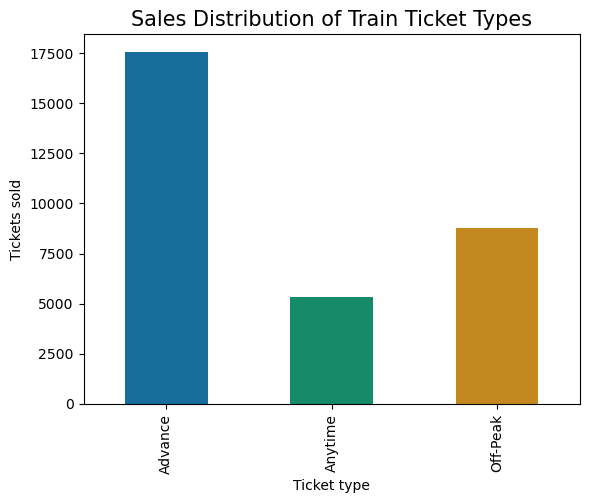

In [59]:
ax = dfTicketFrequency.plot(kind='bar', 
                            color=['#176d9c', '#158b6a', '#c38820'])
# ax.set_facecolor("#fffbf4")

plt.title('Sales Distribution of Train Ticket Types', size=15)
plt.xlabel('Ticket type')
plt.ylabel('Tickets sold')
# plt.grid(alpha=0.4)

savePlotFunction(1)

In [60]:
dfCopy.head()

,Transaction_ID,Date_of_Purchase,Time_of_Purchase,Purchase_Type,Payment_Method,Railcard,Ticket_Class,Ticket_Type,Price,Departure_Station,Arrival_Destination,Date_of_Journey,Departure_Time,Arrival_Time,Actual_Arrival_Time,Journey_Status,Reason_for_Delay,Refund_Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London_Paddington,Liverpool_Lime_Street,2024-01-01,11:00:00,13:30:00,13:30:00,On_Time,No_Delay,0
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit_Card,Adult,Standard,Advance,23,London_Kings_Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Technical_Issue,0
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit_Card,None,Standard,Advance,3,Liverpool_Lime_Street,Manchester_Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On_Time,No_Delay,0
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit_Card,None,Standard,Advance,13,London_Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On_Time,No_Delay,0
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,None,Standard,Advance,76,Liverpool_Lime_Street,London_Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On_Time,No_Delay,0


In [61]:
dfCopy['Ticket_Class'].value_counts()

Ticket_Class
Standard       28595
First_Class     3058
Name: count, dtype: int64

In [62]:
# Create a variable for the ticket classes 
dfTicketClass = dfCopy['Ticket_Class'].value_counts()

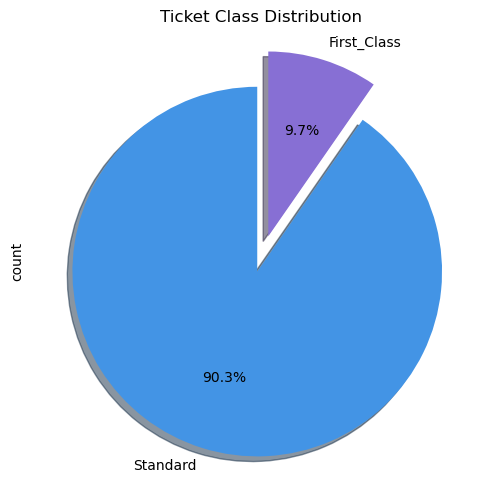

In [63]:
# Create a pie chart to show the difference between Standard and First Class tickets
explode = [0.06, 0.14]
dfTicketClass.plot.pie(labels = dfTicketClass.index,
                       autopct = '%1.1f%%',
                       figsize = (6, 6), 
                       startangle = 90,
                       colors = ['#4394E5', '#876FD4'],
                       explode = explode, 
                       shadow = True,
                       title='Ticket Class Distribution')

# plt.ylabel('')
savePlotFunction(16)

In [64]:
# Look at the trends over time, weekdays, weekends, peak vs off peak times
# dfTicketDensity = dfCopy.groupby(['Ticket_Type', 'Date_of_Journey'])['Date_of_Journey'].count()
# print(ticketDensity)

## How does revenue vary by ticket types and classes?

In [66]:
# Create a copy of the data frame df_Copy called TicketType to look at the differences between ticket type
dfTicketType = dfCopy.copy(deep=True)

In [67]:
# Confirm the copy has been created
dfTicketType.head()

,Transaction_ID,Date_of_Purchase,Time_of_Purchase,Purchase_Type,Payment_Method,Railcard,Ticket_Class,Ticket_Type,Price,Departure_Station,Arrival_Destination,Date_of_Journey,Departure_Time,Arrival_Time,Actual_Arrival_Time,Journey_Status,Reason_for_Delay,Refund_Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London_Paddington,Liverpool_Lime_Street,2024-01-01,11:00:00,13:30:00,13:30:00,On_Time,No_Delay,0
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit_Card,Adult,Standard,Advance,23,London_Kings_Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Technical_Issue,0
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit_Card,None,Standard,Advance,3,Liverpool_Lime_Street,Manchester_Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On_Time,No_Delay,0
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit_Card,None,Standard,Advance,13,London_Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On_Time,No_Delay,0
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,None,Standard,Advance,76,Liverpool_Lime_Street,London_Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On_Time,No_Delay,0


In [68]:
# Set the index to Date_of_Purchase 
dfTicketType.set_index('Date_of_Purchase', inplace = True)
dfTicketType.head()  

,Transaction_ID,Time_of_Purchase,Purchase_Type,Payment_Method,Railcard,Ticket_Class,Ticket_Type,Price,Departure_Station,Arrival_Destination,Date_of_Journey,Departure_Time,Arrival_Time,Actual_Arrival_Time,Journey_Status,Reason_for_Delay,Refund_Request
Date_of_Purchase,,,,,,,,,,,,,,,,,
2023-12-08,da8a6ba8-b3dc-4677-b176,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London_Paddington,Liverpool_Lime_Street,2024-01-01,11:00:00,13:30:00,13:30:00,On_Time,No_Delay,0
2023-12-16,b0cdd1b0-f214-4197-be53,11:23:01,Station,Credit_Card,Adult,Standard,Advance,23,London_Kings_Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Technical_Issue,0
2023-12-19,f3ba7a96-f713-40d9-9629,19:51:27,Online,Credit_Card,None,Standard,Advance,3,Liverpool_Lime_Street,Manchester_Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On_Time,No_Delay,0
2023-12-20,b2471f11-4fe7-4c87-8ab4,23:00:36,Station,Credit_Card,None,Standard,Advance,13,London_Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On_Time,No_Delay,0
2023-12-27,2be00b45-0762-485e-a7a3,18:22:56,Online,Contactless,None,Standard,Advance,76,Liverpool_Lime_Street,London_Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On_Time,No_Delay,0


In [69]:
# Create a new subset from dfTicketType to show only the 'Advance' values 
dfAdvanced = dfTicketType[dfTicketType['Ticket_Type'] == 'Advance']
dfAdvanced

,Transaction_ID,Time_of_Purchase,Purchase_Type,Payment_Method,Railcard,Ticket_Class,Ticket_Type,Price,Departure_Station,Arrival_Destination,Date_of_Journey,Departure_Time,Arrival_Time,Actual_Arrival_Time,Journey_Status,Reason_for_Delay,Refund_Request
Date_of_Purchase,,,,,,,,,,,,,,,,,
2023-12-08,da8a6ba8-b3dc-4677-b176,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London_Paddington,Liverpool_Lime_Street,2024-01-01,11:00:00,13:30:00,13:30:00,On_Time,No_Delay,0
2023-12-16,b0cdd1b0-f214-4197-be53,11:23:01,Station,Credit_Card,Adult,Standard,Advance,23,London_Kings_Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Technical_Issue,0
2023-12-19,f3ba7a96-f713-40d9-9629,19:51:27,Online,Credit_Card,None,Standard,Advance,3,Liverpool_Lime_Street,Manchester_Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On_Time,No_Delay,0
2023-12-20,b2471f11-4fe7-4c87-8ab4,23:00:36,Station,Credit_Card,None,Standard,Advance,13,London_Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On_Time,No_Delay,0
2023-12-27,2be00b45-0762-485e-a7a3,18:22:56,Online,Contactless,None,Standard,Advance,76,Liverpool_Lime_Street,London_Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On_Time,No_Delay,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-29,ac94db63-b039-47b2-a27e,23:11:04,Station,Credit_Card,None,Standard,Advance,13,London_Paddington,Reading,2024-04-30,21:30:00,22:30:00,22:30:00,On_Time,No_Delay,0
2024-04-29,d4382b23-584d-48a1-ba99,23:30:59,Station,Contactless,None,Standard,Advance,35,London_Kings_Cross,York,2024-04-30,22:00:00,23:50:00,23:50:00,On_Time,No_Delay,0
2024-04-29,b8709120-5530-408f-aaf1,23:41:24,Station,Contactless,None,Standard,Advance,8,London_St_Pancras,Birmingham_New_Street,2024-04-30,22:00:00,23:20:00,23:20:00,On_Time,No_Delay,0


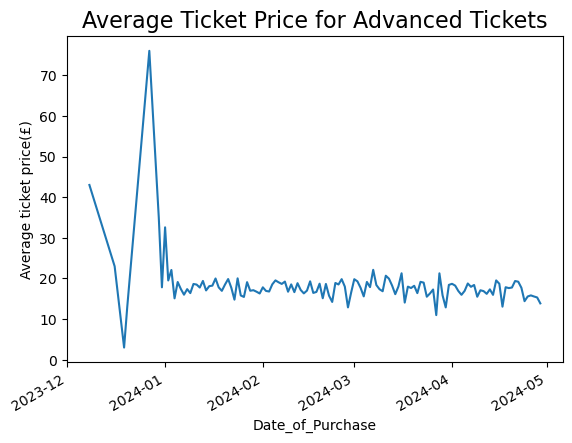

In [70]:
# Create a time series showing the average price for advance ticket type
ts = dfAdvanced.groupby('Date_of_Purchase')['Price'].mean()

plt.title('Average Ticket Price for Advanced Tickets', size = 16)
plt.xlabel('Date of purchase')
plt.ylabel('Average ticket price(£)')
# plt.xticks(rotation=45)
ts.plot()

savePlotFunction(2)

In [71]:
# Look at the summary statistics for presentation
dfAdvanced.describe()

,Price,Date_of_Journey,Refund_Request
count,17561.000000,17561,17561.000000
mean,17.611412,2024-02-29 09:19:24.193383168,0.034793
min,1.000000,2024-01-01 00:00:00,0.000000
25%,4.000000,2024-02-03 00:00:00,0.000000
50%,8.000000,2024-02-26 00:00:00,0.000000
75%,23.000000,2024-03-27 00:00:00,0.000000
max,135.000000,2024-04-30 00:00:00,1.000000
std,20.975300,NaN,0.183260


In [72]:
# Create a subset from ticket type df for Off-Peak tickets 
dfOffPeak = dfTicketType[dfTicketType['Ticket_Type'] == 'Off-Peak']
dfOffPeak

,Transaction_ID,Time_of_Purchase,Purchase_Type,Payment_Method,Railcard,Ticket_Class,Ticket_Type,Price,Departure_Station,Arrival_Destination,Date_of_Journey,Departure_Time,Arrival_Time,Actual_Arrival_Time,Journey_Status,Reason_for_Delay,Refund_Request
Date_of_Purchase,,,,,,,,,,,,,,,,,
2024-01-01,a3a42b1b-bf7f-43d9-b63c,01:10:20,Station,Contactless,None,Standard,Off-Peak,10,London_Euston,Birmingham_New_Street,2024-01-01,23:30:00,00:50:00,00:50:00,On_Time,No_Delay,0
2024-01-01,ea7108cf-382b-4794-aa8c,01:16:20,Online,Contactless,None,Standard,Off-Peak,4,Manchester_Piccadilly,Liverpool_Lime_Street,2024-01-01,02:45:00,03:15:00,03:15:00,On_Time,No_Delay,0
2024-01-01,d8275e2a-8493-4b30-b6e0,03:02:34,Station,Contactless,None,Standard,Off-Peak,12,London_St_Pancras,Birmingham_New_Street,2024-01-01,04:30:00,05:50:00,05:50:00,On_Time,No_Delay,0
2024-01-01,b7cf7da5-b4c2-4e24-897c,03:03:49,Online,Credit_Card,None,Standard,Off-Peak,33,Birmingham_New_Street,London_St_Pancras,2024-01-01,04:30:00,05:50:00,05:50:00,On_Time,No_Delay,0
2024-01-01,58a7ad60-8670-41a4-87ba,03:35:48,Online,Credit_Card,Adult,Standard,Off-Peak,3,Liverpool_Lime_Street,Manchester_Piccadilly,2024-01-01,05:00:00,05:30:00,05:30:00,On_Time,No_Delay,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-30,1304623d-b8b7-4999-8e9c,18:42:58,Online,Credit_Card,None,Standard,Off-Peak,4,Manchester_Piccadilly,Liverpool_Lime_Street,2024-04-30,20:00:00,20:30:00,20:30:00,On_Time,No_Delay,0
2024-04-30,7da22246-f480-417c-bc2f,18:46:10,Online,Contactless,None,Standard,Off-Peak,10,London_Euston,Birmingham_New_Street,2024-04-30,20:15:00,21:35:00,21:35:00,On_Time,No_Delay,0
2024-04-30,add9debf-46c1-4c75-b52d,18:56:41,Station,Credit_Card,None,Standard,Off-Peak,4,Manchester_Piccadilly,Liverpool_Lime_Street,2024-04-30,20:15:00,20:45:00,20:45:00,On_Time,No_Delay,0


In [73]:
dfOffPeak.head()

,Transaction_ID,Time_of_Purchase,Purchase_Type,Payment_Method,Railcard,Ticket_Class,Ticket_Type,Price,Departure_Station,Arrival_Destination,Date_of_Journey,Departure_Time,Arrival_Time,Actual_Arrival_Time,Journey_Status,Reason_for_Delay,Refund_Request
Date_of_Purchase,,,,,,,,,,,,,,,,,
2024-01-01,a3a42b1b-bf7f-43d9-b63c,01:10:20,Station,Contactless,None,Standard,Off-Peak,10,London_Euston,Birmingham_New_Street,2024-01-01,23:30:00,00:50:00,00:50:00,On_Time,No_Delay,0
2024-01-01,ea7108cf-382b-4794-aa8c,01:16:20,Online,Contactless,None,Standard,Off-Peak,4,Manchester_Piccadilly,Liverpool_Lime_Street,2024-01-01,02:45:00,03:15:00,03:15:00,On_Time,No_Delay,0
2024-01-01,d8275e2a-8493-4b30-b6e0,03:02:34,Station,Contactless,None,Standard,Off-Peak,12,London_St_Pancras,Birmingham_New_Street,2024-01-01,04:30:00,05:50:00,05:50:00,On_Time,No_Delay,0
2024-01-01,b7cf7da5-b4c2-4e24-897c,03:03:49,Online,Credit_Card,None,Standard,Off-Peak,33,Birmingham_New_Street,London_St_Pancras,2024-01-01,04:30:00,05:50:00,05:50:00,On_Time,No_Delay,0
2024-01-01,58a7ad60-8670-41a4-87ba,03:35:48,Online,Credit_Card,Adult,Standard,Off-Peak,3,Liverpool_Lime_Street,Manchester_Piccadilly,2024-01-01,05:00:00,05:30:00,05:30:00,On_Time,No_Delay,0


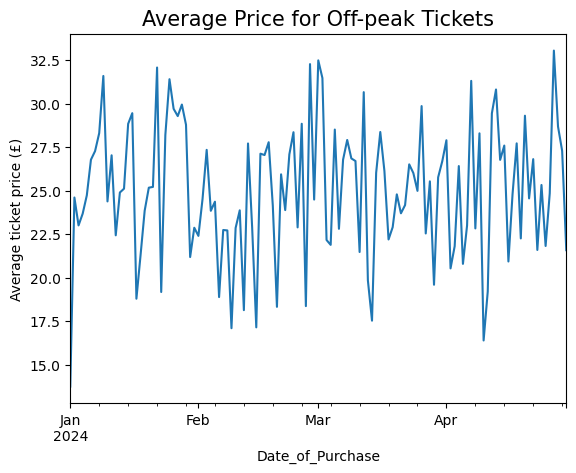

In [74]:
# Create a time series showing the average price for off-peak ticket type
ts = dfOffPeak.groupby('Date_of_Purchase')['Price'].mean()

plt.title('Average Price for Off-peak Tickets', size = 15)
plt.xlabel('Date of purchase')
plt.ylabel('Average ticket price (£)')
# plt.margins(x=0.2, y=0.2)
ts.plot()

savePlotFunction(3)

In [75]:
# Look at the summary statistics for presentation
dfOffPeak.describe()

,Price,Date_of_Journey,Refund_Request
count,8752.000000,8752,8752.000000
mean,25.518510,2024-03-03 02:59:10.639854080,0.042162
min,2.000000,2024-01-01 00:00:00,0.000000
25%,7.000000,2024-01-28 00:00:00,0.000000
50%,12.000000,2024-03-09 00:00:00,0.000000
75%,35.000000,2024-04-05 00:00:00,0.000000
max,203.000000,2024-04-30 00:00:00,1.000000
std,30.609675,NaN,0.200970


In [76]:
# Create a subset from ticket type df for Anytime tickets
dfAnytime = dfTicketType[dfTicketType['Ticket_Type'] == 'Anytime']
dfAnytime

,Transaction_ID,Time_of_Purchase,Purchase_Type,Payment_Method,Railcard,Ticket_Class,Ticket_Type,Price,Departure_Station,Arrival_Destination,Date_of_Journey,Departure_Time,Arrival_Time,Actual_Arrival_Time,Journey_Status,Reason_for_Delay,Refund_Request
Date_of_Purchase,,,,,,,,,,,,,,,,,
2024-01-01,5e9a7d23-03aa-4283-92b7,04:31:41,Station,Credit_Card,Disabled,Standard,Anytime,4,Liverpool_Lime_Street,Manchester_Piccadilly,2024-01-01,06:00:00,06:30:00,06:30:00,On_Time,No_Delay,0
2024-01-01,15f1839c-33c7-4528-9e7b,04:54:54,Online,Credit_Card,None,Standard,Anytime,70,London_Kings_Cross,York,2024-01-01,06:15:00,08:05:00,08:05:00,On_Time,No_Delay,0
2024-01-01,cba78e3f-e1da-4e36-9b9e,05:05:29,Station,Contactless,None,Standard,Anytime,70,London_Kings_Cross,York,2024-01-01,06:30:00,08:20:00,08:20:00,On_Time,No_Delay,0
2024-01-01,41327548-3375-456d-8c38,05:07:28,Station,Credit_Card,None,Standard,Anytime,16,London_St_Pancras,Birmingham_New_Street,2024-01-01,06:30:00,07:50:00,07:50:00,On_Time,No_Delay,0
2024-01-01,a9b958eb-96a2-482c-a58b,05:14:54,Online,Credit_Card,Disabled,Standard,Anytime,29,Birmingham_New_Street,London_St_Pancras,2024-01-01,06:30:00,07:50:00,07:50:00,On_Time,No_Delay,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-30,2e96cde6-50c1-4311-8089,17:16:04,Station,Credit_Card,Adult,Standard,Anytime,95,London_Euston,Manchester_Piccadilly,2024-04-30,18:45:00,20:35:00,Train_Cancelled,Cancelled,Technical_Issue,1
2024-04-30,09e207d9-db49-4ec0-9c4f,17:21:14,Online,Contactless,None,Standard,Anytime,5,Manchester_Piccadilly,Liverpool_Lime_Street,2024-04-30,18:45:00,19:15:00,Train_Cancelled,Cancelled,Weather,0
2024-04-30,43675a86-9531-4a50-929f,17:25:13,Online,Credit_Card,None,Standard,Anytime,10,Birmingham_New_Street,Tamworth,2024-04-30,18:45:00,19:05:00,19:05:00,On_Time,No_Delay,0


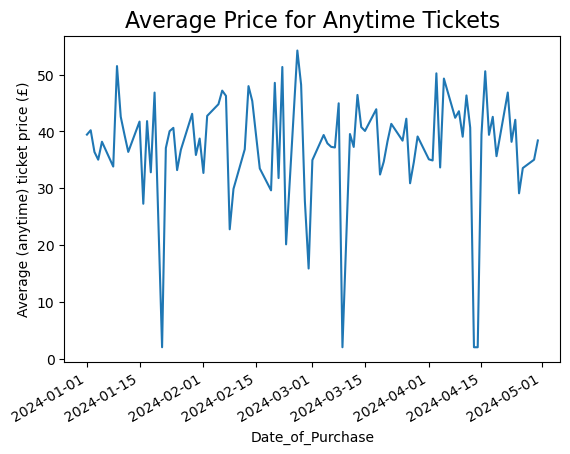

In [77]:
# Create a time series showing the average price for anytime ticket type
ts = dfAnytime.groupby('Date_of_Purchase')['Price'].mean()

plt.title('Average Price for Anytime Tickets', size = 16)
plt.xlabel('Date of purchase')
plt.ylabel('Average (anytime) ticket price (£)')
ts.plot()

savePlotFunction(4)

In [78]:
# Look at the summary statistics for presentation
dfAnytime.describe()

,Price,Date_of_Journey,Refund_Request
count,5340.000000,5340,5340.000000
mean,39.196442,2024-03-01 12:14:17.528089856,0.025843
min,2.000000,2024-01-01 00:00:00,0.000000
25%,9.000000,2024-01-26 00:00:00,0.000000
50%,17.000000,2024-03-07 00:00:00,0.000000
75%,67.000000,2024-04-03 00:00:00,0.000000
max,267.000000,2024-04-30 00:00:00,1.000000
std,44.551699,NaN,0.158681


In [79]:
# Compare the average ticket price for each ticket type 
dfAveragePrice = dfTicketType.groupby('Ticket_Type')['Price'].mean()
dfAveragePrice

Ticket_Type
Advance     17.611412
Anytime     39.196442
Off-Peak    25.518510
Name: Price, dtype: float64

C:\Users\hjame\AppData\Local\Temp\ipykernel_16052\4040338796.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfTicketType, x='Ticket_Type', y='Price', palette='colorblind')


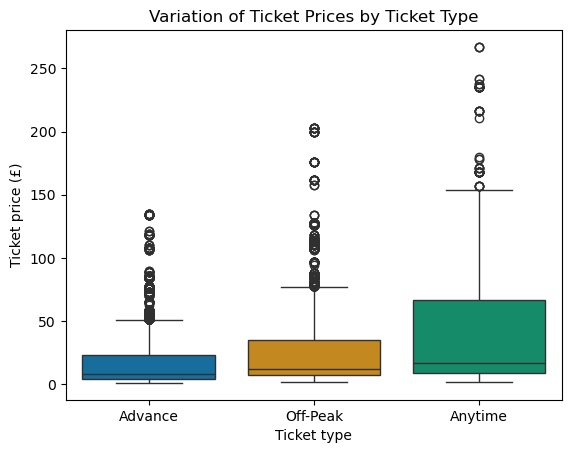

In [80]:
# Create a box plot to highlight the outliers

sns.boxplot(data=dfTicketType, x='Ticket_Type', y='Price', palette='colorblind')
plt.xlabel('Ticket type')
plt.ylabel('Ticket price (£)')
plt.title('Variation of Ticket Prices by Ticket Type')

savePlotFunction(17)

## What are the most popular routes?

In [82]:
# Create a copy of the df_copy called dfRoutes with the Departure Station and Arrival Destination columns
dfRoutes = dfCopy.copy(deep=True)
dfRoutes = dfRoutes[['Departure_Station', 'Arrival_Destination']]

In [83]:
# Group the data by the unique route combinations, count the frequencies of each group
# Create column to count the number occurences for each route
dfRoutes = dfRoutes.groupby(['Departure_Station', 'Arrival_Destination']).size().reset_index(name='Count')

In [84]:
# Sort the routes column count in descending order to show the popular routes 
dfRoutes = dfRoutes.sort_values(by='Count', ascending=False)

In [85]:
dfRoutes

,Departure_Station,Arrival_Destination,Count
40,Manchester_Piccadilly,Liverpool_Lime_Street,4628
24,London_Euston,Birmingham_New_Street,4209
30,London_Kings_Cross,York,3922
35,London_Paddington,Reading,3873
36,London_St_Pancras,Birmingham_New_Street,3471
...,...,...,...
48,Manchester_Piccadilly,York,15
60,York,Edinburgh_Waverley,15
47,Manchester_Piccadilly,Warrington,15
64,York,Wakefield,15


In [86]:
# Create a function to combine the columns to show the route
# Use \n as a line breaker so the 'to' appears between the departure station and arrival destination
def combine_columns(row):
    return f'{row['Departure_Station']}\n to \n{row['Arrival_Destination']}'

In [87]:
# Create new column called 'Route' to show the combination of the two columns
dfRoutes['Route'] = dfRoutes.apply(combine_columns, axis=1)

In [88]:
dfRoutes.head(10)

,Departure_Station,Arrival_Destination,Count,Route
40,Manchester_Piccadilly,Liverpool_Lime_Street,4628,Manchester_Piccadilly\n to \nLiverpool_Lime_St...
24,London_Euston,Birmingham_New_Street,4209,London_Euston\n to \nBirmingham_New_Street
30,London_Kings_Cross,York,3922,London_Kings_Cross\n to \nYork
35,London_Paddington,Reading,3873,London_Paddington\n to \nReading
36,London_St_Pancras,Birmingham_New_Street,3471,London_St_Pancras\n to \nBirmingham_New_Street
22,Liverpool_Lime_Street,Manchester_Piccadilly,3002,Liverpool_Lime_Street\n to \nManchester_Piccad...
19,Liverpool_Lime_Street,London_Euston,1097,Liverpool_Lime_Street\n to \nLondon_Euston
25,London_Euston,Manchester_Piccadilly,712,London_Euston\n to \nManchester_Piccadilly
6,Birmingham_New_Street,London_St_Pancras,702,Birmingham_New_Street\n to \nLondon_St_Pancras
34,London_Paddington,Oxford,485,London_Paddington\n to \nOxford


In [89]:
dfRoutes.tail(10)

,Departure_Station,Arrival_Destination,Count,Route
14,Bristol_Temple_Meads,Cardiff_Central,16,Bristol_Temple_Meads\n to \nCardiff_Central
44,Manchester_Piccadilly,London_St_Pancras,16,Manchester_Piccadilly\n to \nLondon_St_Pancras
26,London_Euston,Oxford,16,London_Euston\n to \nOxford
42,Manchester_Piccadilly,London_Kings_Cross,16,Manchester_Piccadilly\n to \nLondon_Kings_Cross
62,York,Liverpool_Lime_Street,15,York\n to \nLiverpool_Lime_Street
48,Manchester_Piccadilly,York,15,Manchester_Piccadilly\n to \nYork
60,York,Edinburgh_Waverley,15,York\n to \nEdinburgh_Waverley
47,Manchester_Piccadilly,Warrington,15,Manchester_Piccadilly\n to \nWarrington
64,York,Wakefield,15,York\n to \nWakefield
16,Liverpool_Lime_Street,Birmingham_New_Street,14,Liverpool_Lime_Street\n to \nBirmingham_New_St...


In [90]:
# Filter popular train routes to show routes with over 1000 journeys

In [91]:
dfPopularRoutes = dfRoutes[dfRoutes['Count'] > 1000]
dfPopularRoutes.head(30)

,Departure_Station,Arrival_Destination,Count,Route
40,Manchester_Piccadilly,Liverpool_Lime_Street,4628,Manchester_Piccadilly\n to \nLiverpool_Lime_St...
24,London_Euston,Birmingham_New_Street,4209,London_Euston\n to \nBirmingham_New_Street
30,London_Kings_Cross,York,3922,London_Kings_Cross\n to \nYork
35,London_Paddington,Reading,3873,London_Paddington\n to \nReading
36,London_St_Pancras,Birmingham_New_Street,3471,London_St_Pancras\n to \nBirmingham_New_Street
22,Liverpool_Lime_Street,Manchester_Piccadilly,3002,Liverpool_Lime_Street\n to \nManchester_Piccad...
19,Liverpool_Lime_Street,London_Euston,1097,Liverpool_Lime_Street\n to \nLondon_Euston


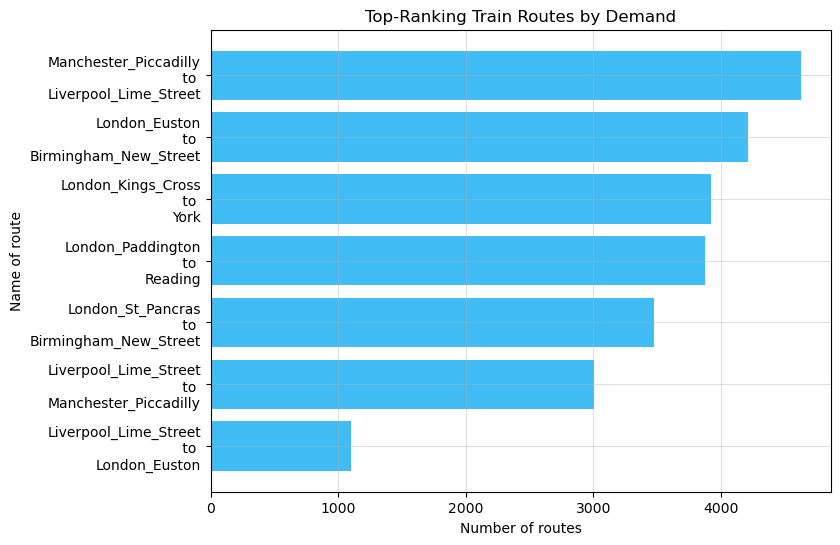

In [92]:
x = dfPopularRoutes['Route']
y = dfPopularRoutes['Count']

plt.figure(figsize=(8, 6))
plt.barh(x, y, color='#42bcf5')
plt.xlabel('Number of routes')
plt.ylabel('Name of route')
plt.title('Top-Ranking Train Routes by Demand')

plt.grid(alpha=0.4)
plt.gca().invert_yaxis()
savePlotFunction(5)

In [93]:
# Create new subset of data that represent routes with 15 or less journeys
dfUnPopularRoutes = dfRoutes[dfRoutes['Count'] < 16]
dfUnPopularRoutes.head(10)

,Departure_Station,Arrival_Destination,Count,Route
62,York,Liverpool_Lime_Street,15,York\n to \nLiverpool_Lime_Street
48,Manchester_Piccadilly,York,15,Manchester_Piccadilly\n to \nYork
60,York,Edinburgh_Waverley,15,York\n to \nEdinburgh_Waverley
47,Manchester_Piccadilly,Warrington,15,Manchester_Piccadilly\n to \nWarrington
64,York,Wakefield,15,York\n to \nWakefield
16,Liverpool_Lime_Street,Birmingham_New_Street,14,Liverpool_Lime_Street\n to \nBirmingham_New_St...


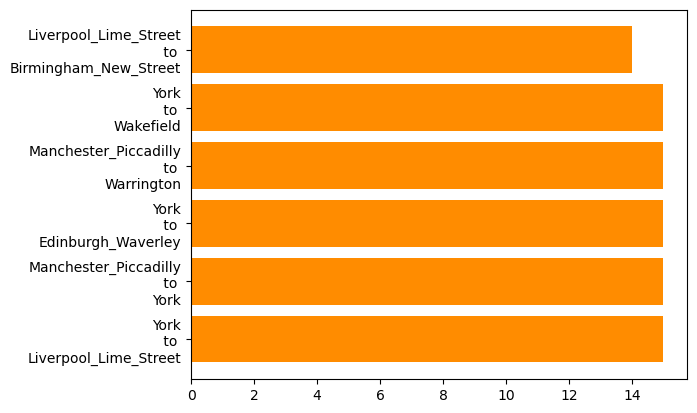

In [94]:
plt.barh(dfUnPopularRoutes['Route'], dfUnPopularRoutes['Count'], color='darkorange')

plt.show()

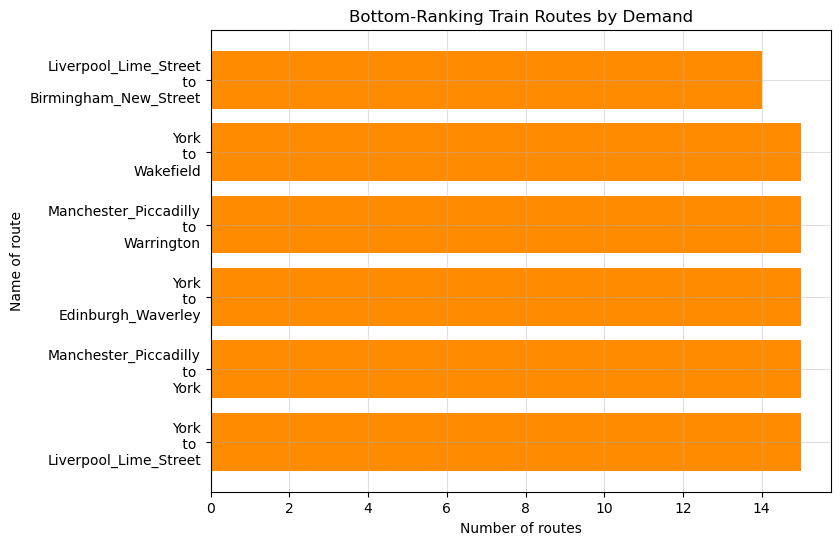

In [95]:
x = dfUnPopularRoutes['Route']
y = dfUnPopularRoutes['Count']

plt.figure(figsize=(8, 6))
plt.barh(x, y, color='darkorange')
plt.xlabel('Number of routes')
plt.ylabel('Name of route')
plt.title('Bottom-Ranking Train Routes by Demand')
plt.grid(alpha=0.4)

savePlotFunction(18)

In [96]:
# heatmapData = popularRoutes.pivot_table(values = 'Count',
#                                    index ='Departure_Station', 
#                                    columns = 'Arrival_Destination',
#                                    fill_value = 0)
# plt.figure(figsize = (10, 8))
# sns.heatmap(heatmapData, cmap = 'coolwarm', annot=True)
# plt.title('Frequency of Route Usage')
# plt.show()


# Train disruption

In [98]:
# Create subset of the data frame dfCopy for cancelled/delayed journeys
dfCancel = dfCopy.copy(deep = True)
dfCancel

,Transaction_ID,Date_of_Purchase,Time_of_Purchase,Purchase_Type,Payment_Method,Railcard,Ticket_Class,Ticket_Type,Price,Departure_Station,Arrival_Destination,Date_of_Journey,Departure_Time,Arrival_Time,Actual_Arrival_Time,Journey_Status,Reason_for_Delay,Refund_Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London_Paddington,Liverpool_Lime_Street,2024-01-01,11:00:00,13:30:00,13:30:00,On_Time,No_Delay,0
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit_Card,Adult,Standard,Advance,23,London_Kings_Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Technical_Issue,0
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit_Card,None,Standard,Advance,3,Liverpool_Lime_Street,Manchester_Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On_Time,No_Delay,0
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit_Card,None,Standard,Advance,13,London_Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On_Time,No_Delay,0
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,None,Standard,Advance,76,Liverpool_Lime_Street,London_Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On_Time,No_Delay,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31648,1304623d-b8b7-4999-8e9c,2024-04-30,18:42:58,Online,Credit_Card,None,Standard,Off-Peak,4,Manchester_Piccadilly,Liverpool_Lime_Street,2024-04-30,20:00:00,20:30:00,20:30:00,On_Time,No_Delay,0
31649,7da22246-f480-417c-bc2f,2024-04-30,18:46:10,Online,Contactless,None,Standard,Off-Peak,10,London_Euston,Birmingham_New_Street,2024-04-30,20:15:00,21:35:00,21:35:00,On_Time,No_Delay,0
31650,add9debf-46c1-4c75-b52d,2024-04-30,18:56:41,Station,Credit_Card,None,Standard,Off-Peak,4,Manchester_Piccadilly,Liverpool_Lime_Street,2024-04-30,20:15:00,20:45:00,20:45:00,On_Time,No_Delay,0
31651,b92b047c-21fd-4859-966a,2024-04-30,19:51:47,Station,Credit_Card,None,Standard,Off-Peak,10,London_Euston,Birmingham_New_Street,2024-04-30,21:15:00,22:35:00,22:35:00,On_Time,No_Delay,0


In [99]:
dfStatusCounts = dfCancel['Journey_Status'].value_counts()

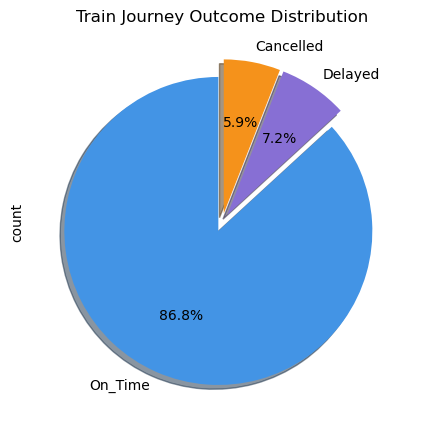

In [100]:
explode = [0.06] * len(dfStatusCounts)

dfStatusCounts.plot.pie(labels = dfStatusCounts.index,
                        autopct='%1.1f%%',
                        figsize=(5, 5), 
                        startangle=90,
                        colors=['#4394E5', '#876FD4', '#F5921B'],
                        explode=explode, 
                        shadow=True,
                        title='Train Journey Outcome Distribution')
# plt.ylabel('')
savePlotFunction(6)

In [101]:
# Create horizontal barchart to show the reasons for why the trains were delayed or cancelled

In [102]:
dfCancel['Reason_for_Delay'].value_counts()

Reason_for_Delay
No_Delay           27481
Technical_Issue     1677
Weather             1372
Staff_Issue          809
Traffic              314
Name: count, dtype: int64

## How often do customers ask for a refund?

In [104]:
dfCopy.head()

,Transaction_ID,Date_of_Purchase,Time_of_Purchase,Purchase_Type,Payment_Method,Railcard,Ticket_Class,Ticket_Type,Price,Departure_Station,Arrival_Destination,Date_of_Journey,Departure_Time,Arrival_Time,Actual_Arrival_Time,Journey_Status,Reason_for_Delay,Refund_Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London_Paddington,Liverpool_Lime_Street,2024-01-01,11:00:00,13:30:00,13:30:00,On_Time,No_Delay,0
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit_Card,Adult,Standard,Advance,23,London_Kings_Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Technical_Issue,0
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit_Card,None,Standard,Advance,3,Liverpool_Lime_Street,Manchester_Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On_Time,No_Delay,0
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit_Card,None,Standard,Advance,13,London_Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On_Time,No_Delay,0
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,None,Standard,Advance,76,Liverpool_Lime_Street,London_Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On_Time,No_Delay,0


In [105]:
dfRefundCount = dfCopy['Refund_Request'].value_counts()
dfRefundCount

Refund_Request
0    30535
1     1118
Name: count, dtype: int64

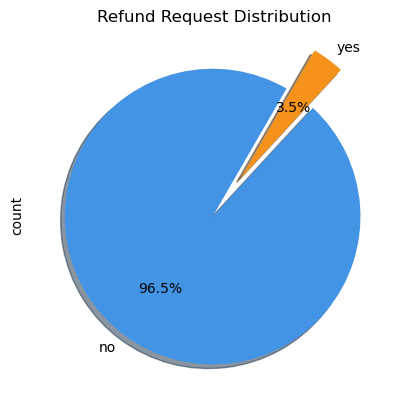

In [106]:

explode = [0.02, 0.3]
labels = ['no', 'yes']

dfRefundCount.plot.pie(labels=labels,
                       autopct='%1.1f%%', explode=explode,
                       shadow=True, startangle=60,
                       colors=['#4394E5', '#F5921B'],
                       title='Refund Request Distribution')

savePlotFunction(7)

# Train delays 

In [108]:
# Create copy of dfCopy called dfDelay for train delay analysis 
dfDelay = dfTrainData.copy(deep=True)
dfDelay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Transaction_ID       31653 non-null  object        
 1   Date_of_Purchase     31653 non-null  datetime64[ns]
 2   Time_of_Purchase     31653 non-null  object        
 3   Purchase_Type        31653 non-null  object        
 4   Payment_Method       31653 non-null  object        
 5   Railcard             31653 non-null  object        
 6   Ticket_Class         31653 non-null  object        
 7   Ticket_Type          31653 non-null  object        
 8   Price                31653 non-null  int64         
 9   Departure_Station    31653 non-null  object        
 10  Arrival_Destination  31653 non-null  object        
 11  Date_of_Journey      31653 non-null  datetime64[ns]
 12  Departure_Time       31653 non-null  object        
 13  Arrival_Time         31653 non-

In [109]:
dfDelay['Reason_for_Delay'].value_counts()

Reason_for_Delay
No_Delay           27481
Technical_Issue     1677
Weather             1372
Staff_Issue          809
Traffic              314
Name: count, dtype: int64

In [110]:
# Remove all the entries in the 'Reason_for_Delay column that have 'No_Delay'
# Only wanting to focus on the journeys that were delayed
dfDelay = dfDelay[dfDelay['Reason_for_Delay'] != 'No_Delay']
dfOnlyDelayed = dfDelay[dfDelay['Journey_Status'] == 'Delayed']

In [111]:
dfDelay['Reason_for_Delay'].value_counts()

Reason_for_Delay
Technical_Issue    1677
Weather            1372
Staff_Issue         809
Traffic             314
Name: count, dtype: int64

In [112]:
# Create df called delayCounts to show the all the values
delayCounts = dfDelay['Reason_for_Delay'].value_counts()
delayCounts = delayCounts.sort_values(ascending=True)

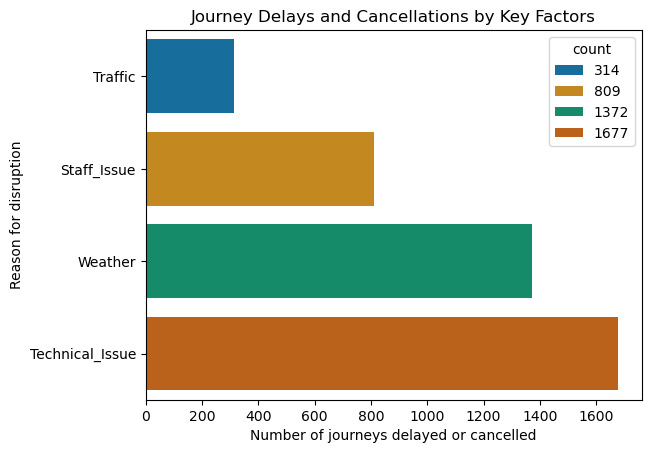

In [113]:
# Display the results in a bar plot

sns.barplot(x=delayCounts.values, 
            y=delayCounts.index,
            hue=delayCounts, 
            palette='colorblind')

plt.xlabel('Number of journeys delayed or cancelled')
plt.ylabel('Reason for disruption')
plt.title('Journey Delays and Cancellations by Key Factors')

savePlotFunction(8)

In [114]:
# Filtwer the train journeys showing only the delayed value and reasons for delays 
dfOnlyDelay = dfDelay[dfDelay['Journey_Status'] == 'Delayed']
dfOnlyDelay['Journey_Status'].head(20)

1      Delayed
8      Delayed
20     Delayed
26     Delayed
45     Delayed
51     Delayed
61     Delayed
101    Delayed
119    Delayed
124    Delayed
130    Delayed
171    Delayed
172    Delayed
202    Delayed
203    Delayed
204    Delayed
212    Delayed
217    Delayed
227    Delayed
265    Delayed
Name: Journey_Status, dtype: object

In [115]:
dfOnlyDelayCounts = dfOnlyDelay['Reason_for_Delay'].value_counts()
dfOnlyDelayCounts = dfOnlyDelayCounts.sort_values(ascending=True)

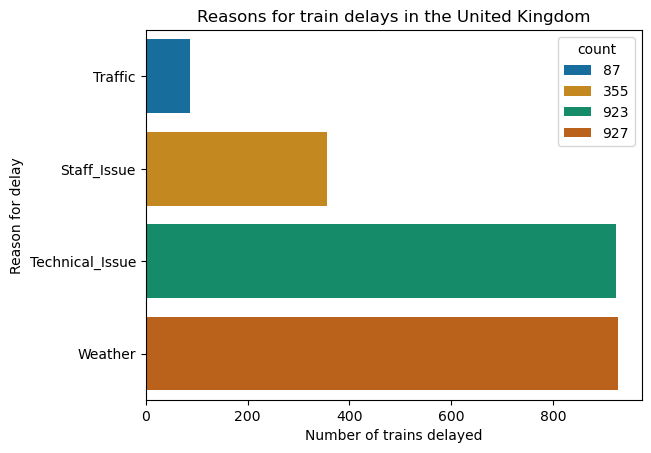

In [116]:
sns.barplot(x=dfOnlyDelayCounts.values, 
            y=dfOnlyDelayCounts.index, 
            hue=dfOnlyDelayCounts, 
            palette='colorblind')

plt.xlabel('Number of trains delayed')
plt.ylabel('Reason for delay')
plt.title('Reasons for train delays in the United Kingdom')


savePlotFunction(9)

In [117]:
dfOnlyDelay.head(50)

,Transaction_ID,Date_of_Purchase,Time_of_Purchase,Purchase_Type,Payment_Method,Railcard,Ticket_Class,Ticket_Type,Price,Departure_Station,Arrival_Destination,Date_of_Journey,Departure_Time,Arrival_Time,Actual_Arrival_Time,Journey_Status,Reason_for_Delay,Refund_Request
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit_Card,Adult,Standard,Advance,23,London_Kings_Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Technical_Issue,0
8,01df916f-4291-41ec-a37d,2023-12-31,01:43:09,Station,Credit_Card,None,Standard,Advance,37,London_Euston,York,2024-01-01,00:00:00,01:50:00,02:07:00,Delayed,Technical_Issue,0
20,8dfbf0fc-aea0-424f-b30e,2023-12-31,11:57:15,Station,Debit_Card,Adult,Standard,Advance,7,Birmingham_New_Street,Manchester_Piccadilly,2024-01-01,11:15:00,12:35:00,13:06:00,Delayed,Technical_Issue,1
26,74462231-5241-46f4-8328,2023-12-31,15:53:46,Online,Credit_Card,Senior,First_Class,Advance,34,Oxford,Bristol_Temple_Meads,2024-01-01,14:15:00,15:30:00,15:54:00,Delayed,Technical_Issue,1
45,767314a0-f839-4607-a3d3,2024-01-01,05:09:30,Station,Credit_Card,None,First_Class,Advance,134,Manchester_Piccadilly,London_Euston,2024-01-02,03:30:00,05:20:00,05:31:00,Delayed,Weather,0
51,382d60f9-9fe0-4920-97e4,2024-01-01,06:34:08,Station,Credit_Card,None,Standard,Anytime,151,Liverpool_Lime_Street,London_Euston,2024-01-01,08:00:00,10:15:00,10:39:00,Delayed,Weather,0
61,711c08ba-eb61-44ba-821a,2024-01-01,09:30:09,Station,Credit_Card,None,First_Class,Advance,134,Manchester_Piccadilly,London_Euston,2024-01-02,08:00:00,09:50:00,10:08:00,Delayed,Weather,0
101,c57dd321-4e2f-46c0-8cfb,2024-01-02,02:13:53,Station,Credit_Card,None,First_Class,Off-Peak,200,Manchester_Piccadilly,London_Euston,2024-01-02,03:30:00,05:20:00,05:31:00,Delayed,Weather,0
119,e5e8c888-b22e-4bf5-aaf6,2024-01-02,04:47:49,Online,Contactless,Adult,Standard,Anytime,47,London_Kings_Cross,York,2024-01-02,06:15:00,08:05:00,08:35:00,Delayed,Technical_Issue,0
124,dc236178-ccb3-4aa1-9cea,2024-01-02,04:58:57,Online,Debit_Card,None,Standard,Anytime,70,London_Kings_Cross,York,2024-01-02,06:15:00,08:05:00,08:35:00,Delayed,Technical_Issue,0


In [118]:
dfDelay.tail()

,Transaction_ID,Date_of_Purchase,Time_of_Purchase,Purchase_Type,Payment_Method,Railcard,Ticket_Class,Ticket_Type,Price,Departure_Station,Arrival_Destination,Date_of_Journey,Departure_Time,Arrival_Time,Actual_Arrival_Time,Journey_Status,Reason_for_Delay,Refund_Request
31639,465e3643-fb67-4deb-8ec9,2024-04-30,17:13:32,Station,Debit_Card,Senior,First_Class,Anytime,144,London_Euston,Manchester_Piccadilly,2024-04-30,18:45:00,20:35:00,Train_Cancelled,Cancelled,Technical_Issue,0
31641,2e96cde6-50c1-4311-8089,2024-04-30,17:16:04,Station,Credit_Card,Adult,Standard,Anytime,95,London_Euston,Manchester_Piccadilly,2024-04-30,18:45:00,20:35:00,Train_Cancelled,Cancelled,Technical_Issue,1
31642,09e207d9-db49-4ec0-9c4f,2024-04-30,17:21:14,Online,Contactless,None,Standard,Anytime,5,Manchester_Piccadilly,Liverpool_Lime_Street,2024-04-30,18:45:00,19:15:00,Train_Cancelled,Cancelled,Weather,0
31644,1eacd955-f539-4c79-adb6,2024-04-30,17:26:33,Online,Credit_Card,None,Standard,Anytime,16,London_St_Pancras,Birmingham_New_Street,2024-04-30,18:45:00,20:05:00,Train_Cancelled,Cancelled,Technical_Issue,0
31645,a0e238b7-1ad1-4bf7-bd6c,2024-04-30,18:11:50,Online,Credit_Card,Senior,First_Class,Anytime,13,Manchester_Piccadilly,Liverpool_Lime_Street,2024-04-30,18:45:00,19:15:00,Train_Cancelled,Cancelled,Weather,0


In [119]:
dfDelay.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4172 entries, 1 to 31645
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Transaction_ID       4172 non-null   object        
 1   Date_of_Purchase     4172 non-null   datetime64[ns]
 2   Time_of_Purchase     4172 non-null   object        
 3   Purchase_Type        4172 non-null   object        
 4   Payment_Method       4172 non-null   object        
 5   Railcard             4172 non-null   object        
 6   Ticket_Class         4172 non-null   object        
 7   Ticket_Type          4172 non-null   object        
 8   Price                4172 non-null   int64         
 9   Departure_Station    4172 non-null   object        
 10  Arrival_Destination  4172 non-null   object        
 11  Date_of_Journey      4172 non-null   datetime64[ns]
 12  Departure_Time       4172 non-null   object        
 13  Arrival_Time         4172 non-null   

In [120]:
# Create two time frames to compare the train delays from first two months and the last two months
startDate = '2024-01-01'
endDate = '2024-04-30'

subsetDateRange = dfOnlyDelay[(dfOnlyDelay['Date_of_Journey']> startDate) & (dfOnlyDelay['Date_of_Journey'] < endDate)]
subsetDateRange.head(10)


,Transaction_ID,Date_of_Purchase,Time_of_Purchase,Purchase_Type,Payment_Method,Railcard,Ticket_Class,Ticket_Type,Price,Departure_Station,Arrival_Destination,Date_of_Journey,Departure_Time,Arrival_Time,Actual_Arrival_Time,Journey_Status,Reason_for_Delay,Refund_Request
45,767314a0-f839-4607-a3d3,2024-01-01,05:09:30,Station,Credit_Card,None,First_Class,Advance,134,Manchester_Piccadilly,London_Euston,2024-01-02,03:30:00,05:20:00,05:31:00,Delayed,Weather,0
61,711c08ba-eb61-44ba-821a,2024-01-01,09:30:09,Station,Credit_Card,None,First_Class,Advance,134,Manchester_Piccadilly,London_Euston,2024-01-02,08:00:00,09:50:00,10:08:00,Delayed,Weather,0
101,c57dd321-4e2f-46c0-8cfb,2024-01-02,02:13:53,Station,Credit_Card,None,First_Class,Off-Peak,200,Manchester_Piccadilly,London_Euston,2024-01-02,03:30:00,05:20:00,05:31:00,Delayed,Weather,0
119,e5e8c888-b22e-4bf5-aaf6,2024-01-02,04:47:49,Online,Contactless,Adult,Standard,Anytime,47,London_Kings_Cross,York,2024-01-02,06:15:00,08:05:00,08:35:00,Delayed,Technical_Issue,0
124,dc236178-ccb3-4aa1-9cea,2024-01-02,04:58:57,Online,Debit_Card,None,Standard,Anytime,70,London_Kings_Cross,York,2024-01-02,06:15:00,08:05:00,08:35:00,Delayed,Technical_Issue,0
130,a6ab593b-474f-41a5-bab9,2024-01-02,05:07:05,Station,Credit_Card,None,Standard,Advance,84,Manchester_Piccadilly,London_Euston,2024-01-03,03:30:00,05:20:00,05:38:00,Delayed,Weather,0
171,abbbe382-faca-4289-b9b7,2024-01-02,07:32:42,Station,Contactless,Adult,Standard,Off-Peak,12,Manchester_Piccadilly,Nottingham,2024-01-02,09:00:00,10:00:00,10:59:00,Delayed,Technical_Issue,0
172,32cabb23-6a69-44e5-a418,2024-01-02,07:33:03,Station,Contactless,Adult,Standard,Off-Peak,10,Manchester_Piccadilly,Leeds,2024-01-02,09:00:00,09:45:00,12:39:00,Delayed,Technical_Issue,0
202,ba9e6ec7-6c30-402d-9793,2024-01-02,09:31:53,Station,Credit_Card,None,Standard,Advance,76,Liverpool_Lime_Street,London_Euston,2024-01-03,08:00:00,10:15:00,11:09:00,Delayed,Weather,0
203,100e0c8f-029e-43ad-9e66,2024-01-02,09:34:01,Station,Credit_Card,None,Standard,Advance,76,Liverpool_Lime_Street,London_Euston,2024-01-03,08:00:00,10:15:00,11:09:00,Delayed,Weather,0


In [121]:
# Filter all the values in the date of journey column to be from the start of January and end of February
delayJanFeb = subsetDateRange[(subsetDateRange['Date_of_Journey'] <= '2024-02-29')]

In [122]:
# Check the last rows of the dataset to ensure the last entry for Date of Journey is 2024-02-09 
delayJanFeb.tail()

,Transaction_ID,Date_of_Purchase,Time_of_Purchase,Purchase_Type,Payment_Method,Railcard,Ticket_Class,Ticket_Type,Price,Departure_Station,Arrival_Destination,Date_of_Journey,Departure_Time,Arrival_Time,Actual_Arrival_Time,Journey_Status,Reason_for_Delay,Refund_Request
15723,eb6299a5-724d-4e16-a60e,2024-02-27,14:40:06,Station,Credit_Card,Adult,Standard,Anytime,9,London_Euston,Birmingham_New_Street,2024-02-27,16:00:00,17:20:00,18:19:00,Delayed,Weather,0
15725,3871ffc5-a4e4-427a-a710,2024-02-27,17:04:11,Station,Debit_Card,Adult,Standard,Anytime,101,Liverpool_Lime_Street,London_Euston,2024-02-27,17:30:00,19:45:00,20:08:00,Delayed,Technical_Issue,1
15749,470fc990-ebcc-40e1-869a,2024-02-28,16:09:04,Station,Credit_Card,None,Standard,Anytime,5,Manchester_Piccadilly,Liverpool_Lime_Street,2024-02-28,17:45:00,18:15:00,18:59:00,Delayed,Traffic,0
15753,1094b5aa-21ad-4a1a-b4b1,2024-02-28,17:42:47,Station,Credit_Card,Adult,Standard,Advance,4,London_Euston,Birmingham_New_Street,2024-02-29,16:00:00,17:20:00,18:13:00,Delayed,Technical_Issue,0
15755,ee47e995-efd2-413a-8784,2024-02-28,18:08:12,Station,Debit_Card,Adult,Standard,Advance,56,Manchester_Piccadilly,London_Euston,2024-02-29,17:30:00,19:20:00,19:39:00,Delayed,Technical_Issue,1


In [123]:
delayJanFeb.head()

,Transaction_ID,Date_of_Purchase,Time_of_Purchase,Purchase_Type,Payment_Method,Railcard,Ticket_Class,Ticket_Type,Price,Departure_Station,Arrival_Destination,Date_of_Journey,Departure_Time,Arrival_Time,Actual_Arrival_Time,Journey_Status,Reason_for_Delay,Refund_Request
45,767314a0-f839-4607-a3d3,2024-01-01,05:09:30,Station,Credit_Card,None,First_Class,Advance,134,Manchester_Piccadilly,London_Euston,2024-01-02,03:30:00,05:20:00,05:31:00,Delayed,Weather,0
61,711c08ba-eb61-44ba-821a,2024-01-01,09:30:09,Station,Credit_Card,None,First_Class,Advance,134,Manchester_Piccadilly,London_Euston,2024-01-02,08:00:00,09:50:00,10:08:00,Delayed,Weather,0
101,c57dd321-4e2f-46c0-8cfb,2024-01-02,02:13:53,Station,Credit_Card,None,First_Class,Off-Peak,200,Manchester_Piccadilly,London_Euston,2024-01-02,03:30:00,05:20:00,05:31:00,Delayed,Weather,0
119,e5e8c888-b22e-4bf5-aaf6,2024-01-02,04:47:49,Online,Contactless,Adult,Standard,Anytime,47,London_Kings_Cross,York,2024-01-02,06:15:00,08:05:00,08:35:00,Delayed,Technical_Issue,0
124,dc236178-ccb3-4aa1-9cea,2024-01-02,04:58:57,Online,Debit_Card,None,Standard,Anytime,70,London_Kings_Cross,York,2024-01-02,06:15:00,08:05:00,08:35:00,Delayed,Technical_Issue,0


In [124]:
# Count the reasons for delay and have them showing in ascending order
delayJanFeb = delayJanFeb['Reason_for_Delay'].value_counts()
delayJanFeb = delayJanFeb.sort_values(ascending = True)

In [125]:
delayJanFeb.head()

Reason_for_Delay
Traffic             41
Staff_Issue        169
Technical_Issue    424
Weather            481
Name: count, dtype: int64

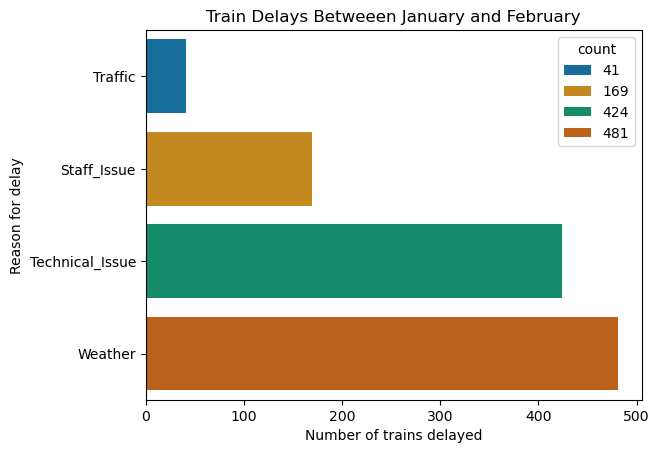

In [126]:
# display the results of delayJanFeb in a barplot
sns.barplot(x=delayJanFeb.values, 
            y=delayJanFeb.index, 
            hue=delayJanFeb, 
            palette='colorblind')

plt.xlabel('Number of trains delayed')
plt.ylabel('Reason for delay')
plt.title('Train Delays Betweeen January and February')


savePlotFunction(11)

In [127]:
# Create subset for April and May check the date of journey so that it starts after 2024-02-09
delayAprMay = subsetDateRange[(subsetDateRange['Date_of_Journey'] > '2024-02-29')]
delayAprMay.head()

,Transaction_ID,Date_of_Purchase,Time_of_Purchase,Purchase_Type,Payment_Method,Railcard,Ticket_Class,Ticket_Type,Price,Departure_Station,Arrival_Destination,Date_of_Journey,Departure_Time,Arrival_Time,Actual_Arrival_Time,Journey_Status,Reason_for_Delay,Refund_Request
14432,a8510c6f-ea53-4381-b54c,2024-02-17,16:11:10,Station,Debit_Card,None,Standard,Advance,84,Manchester_Piccadilly,London_Euston,2024-03-01,15:30:00,17:20:00,17:43:00,Delayed,Staff_Issue,1
15821,954cc5cd-9b02-41f8-8889,2024-03-01,09:37:52,Station,Credit_Card,None,Standard,Advance,76,Liverpool_Lime_Street,London_Euston,2024-03-02,08:00:00,10:15:00,11:07:00,Delayed,Weather,0
15822,085f4010-e237-42da-a248,2024-03-01,09:39:23,Station,Credit_Card,None,Standard,Advance,76,Liverpool_Lime_Street,London_Euston,2024-03-02,08:00:00,10:15:00,11:07:00,Delayed,Weather,0
15826,a69e4d23-f5b3-4b55-8a8a,2024-03-01,12:44:00,Station,Contactless,None,Standard,Advance,3,Manchester_Piccadilly,Liverpool_Lime_Street,2024-03-02,11:00:00,11:30:00,14:26:00,Delayed,Staff_Issue,0
15840,06b1be1d-ebc3-4063-ae7e,2024-03-01,17:00:25,Station,Debit_Card,Adult,Standard,Anytime,101,Liverpool_Lime_Street,London_Euston,2024-03-01,17:30:00,19:45:00,20:03:00,Delayed,Technical_Issue,1


In [128]:
delayAprMay.tail()

,Transaction_ID,Date_of_Purchase,Time_of_Purchase,Purchase_Type,Payment_Method,Railcard,Ticket_Class,Ticket_Type,Price,Departure_Station,Arrival_Destination,Date_of_Journey,Departure_Time,Arrival_Time,Actual_Arrival_Time,Journey_Status,Reason_for_Delay,Refund_Request
31404,fff63592-7176-4266-87d3,2024-04-29,15:00:34,Station,Debit_Card,None,First_Class,Off-Peak,200,Manchester_Piccadilly,London_Euston,2024-04-29,15:30:00,17:20:00,17:33:00,Delayed,Staff_Issue,1
31405,8a840840-59e0-41eb-91cc,2024-04-29,15:03:07,Station,Debit_Card,None,Standard,Off-Peak,113,Liverpool_Lime_Street,London_Euston,2024-04-29,15:30:00,17:45:00,17:46:00,Delayed,Staff_Issue,1
31427,27d138c1-c888-4ec6-8c5a,2024-04-29,16:05:26,Station,Credit_Card,None,First_Class,Anytime,19,Manchester_Piccadilly,Liverpool_Lime_Street,2024-04-29,17:45:00,18:15:00,18:42:00,Delayed,Technical_Issue,0
31428,8e22e0dc-3ec6-463b-9a54,2024-04-29,16:06:51,Station,Credit_Card,None,Standard,Anytime,5,Manchester_Piccadilly,Liverpool_Lime_Street,2024-04-29,17:45:00,18:15:00,18:42:00,Delayed,Technical_Issue,0
31430,32b1c9a7-2321-41b7-8433,2024-04-29,16:13:34,Station,Credit_Card,None,First_Class,Anytime,19,Manchester_Piccadilly,Liverpool_Lime_Street,2024-04-29,17:45:00,18:15:00,18:42:00,Delayed,Technical_Issue,0


In [129]:
# Count the reasons for delay and have them showing in ascending order
delayAprMay = delayAprMay['Reason_for_Delay'].value_counts()
delayAprMay = delayAprMay.sort_values(ascending = True)

In [130]:
delayAprMay.head()

Reason_for_Delay
Traffic             46
Staff_Issue        183
Weather            442
Technical_Issue    490
Name: count, dtype: int64

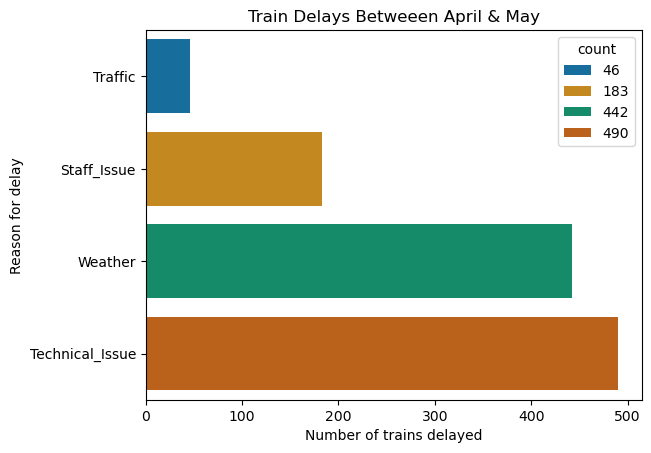

In [131]:
# display delayAprMay in a barplot
sns.barplot(x=delayAprMay.values, 
            y=delayAprMay.index, 
            hue=delayAprMay, 
            palette='colorblind')

plt.xlabel('Number of trains delayed')
plt.ylabel('Reason for delay')
plt.title('Train Delays Betweeen April & May')


savePlotFunction(12)

# Train cancellations 

In [133]:
# Use dfCancel as a data frame for analysis on train cancellations
dfCancel.head()

,Transaction_ID,Date_of_Purchase,Time_of_Purchase,Purchase_Type,Payment_Method,Railcard,Ticket_Class,Ticket_Type,Price,Departure_Station,Arrival_Destination,Date_of_Journey,Departure_Time,Arrival_Time,Actual_Arrival_Time,Journey_Status,Reason_for_Delay,Refund_Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London_Paddington,Liverpool_Lime_Street,2024-01-01,11:00:00,13:30:00,13:30:00,On_Time,No_Delay,0
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit_Card,Adult,Standard,Advance,23,London_Kings_Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Technical_Issue,0
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit_Card,None,Standard,Advance,3,Liverpool_Lime_Street,Manchester_Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On_Time,No_Delay,0
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit_Card,None,Standard,Advance,13,London_Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On_Time,No_Delay,0
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,None,Standard,Advance,76,Liverpool_Lime_Street,London_Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On_Time,No_Delay,0


In [134]:
# Filter the df to only show cancelled values in the journey status column
dfCancel = dfCancel[dfCancel['Journey_Status'] == 'Cancelled']

In [135]:
# Confirm the journey status column only has cancelled value
dfCancel['Journey_Status'].sample(20)

5124     Cancelled
23446    Cancelled
30478    Cancelled
11538    Cancelled
7393     Cancelled
17311    Cancelled
9418     Cancelled
28476    Cancelled
12919    Cancelled
2088     Cancelled
30477    Cancelled
2471     Cancelled
8719     Cancelled
23332    Cancelled
20550    Cancelled
3439     Cancelled
28697    Cancelled
10389    Cancelled
6987     Cancelled
8515     Cancelled
Name: Journey_Status, dtype: object

In [136]:
# Count the reasons for cancellation and have them showing in ascending order
dfCancelValues = dfCancel['Reason_for_Delay'].value_counts()
dfCancelValues = dfCancelValues.sort_values(ascending=True)

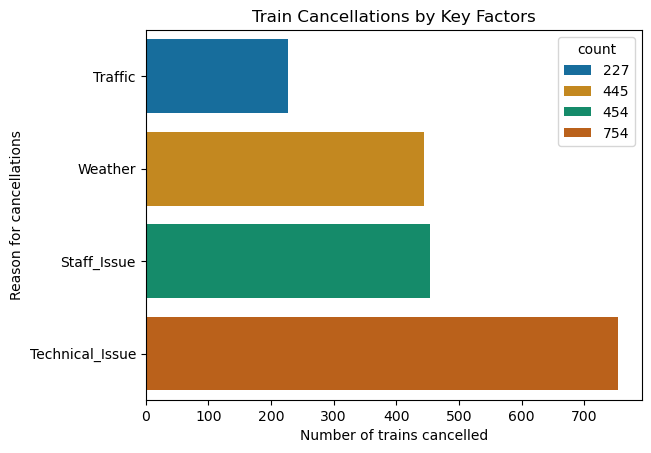

In [137]:
# Create a bar plot to show reasons for train cancellations and by how many
sns.barplot(x=dfCancelValues.values, 
            y=dfCancelValues.index,
            hue=dfCancelValues, 
            palette='colorblind')

plt.xlabel('Number of trains cancelled')
plt.ylabel('Reason for cancellations')
plt.title('Train Cancellations by Key Factors')

savePlotFunction(13)

In [138]:
dfCancel.tail()

,Transaction_ID,Date_of_Purchase,Time_of_Purchase,Purchase_Type,Payment_Method,Railcard,Ticket_Class,Ticket_Type,Price,Departure_Station,Arrival_Destination,Date_of_Journey,Departure_Time,Arrival_Time,Actual_Arrival_Time,Journey_Status,Reason_for_Delay,Refund_Request
31639,465e3643-fb67-4deb-8ec9,2024-04-30,17:13:32,Station,Debit_Card,Senior,First_Class,Anytime,144,London_Euston,Manchester_Piccadilly,2024-04-30,18:45:00,20:35:00,Train_Cancelled,Cancelled,Technical_Issue,0
31641,2e96cde6-50c1-4311-8089,2024-04-30,17:16:04,Station,Credit_Card,Adult,Standard,Anytime,95,London_Euston,Manchester_Piccadilly,2024-04-30,18:45:00,20:35:00,Train_Cancelled,Cancelled,Technical_Issue,1
31642,09e207d9-db49-4ec0-9c4f,2024-04-30,17:21:14,Online,Contactless,None,Standard,Anytime,5,Manchester_Piccadilly,Liverpool_Lime_Street,2024-04-30,18:45:00,19:15:00,Train_Cancelled,Cancelled,Weather,0
31644,1eacd955-f539-4c79-adb6,2024-04-30,17:26:33,Online,Credit_Card,None,Standard,Anytime,16,London_St_Pancras,Birmingham_New_Street,2024-04-30,18:45:00,20:05:00,Train_Cancelled,Cancelled,Technical_Issue,0
31645,a0e238b7-1ad1-4bf7-bd6c,2024-04-30,18:11:50,Online,Credit_Card,Senior,First_Class,Anytime,13,Manchester_Piccadilly,Liverpool_Lime_Street,2024-04-30,18:45:00,19:15:00,Train_Cancelled,Cancelled,Weather,0


In [139]:
dfCancel.head(20)

,Transaction_ID,Date_of_Purchase,Time_of_Purchase,Purchase_Type,Payment_Method,Railcard,Ticket_Class,Ticket_Type,Price,Departure_Station,Arrival_Destination,Date_of_Journey,Departure_Time,Arrival_Time,Actual_Arrival_Time,Journey_Status,Reason_for_Delay,Refund_Request
39,69eaff73-ca3a-4831-905b,2024-01-01,03:52:29,Online,Credit_Card,None,Standard,Advance,7,London_Euston,Birmingham_New_Street,2024-01-02,02:15:00,03:35:00,Train_Cancelled,Cancelled,Technical_Issue,0
75,a88f097f-bda3-4394-9c7d,2024-01-01,17:43:02,Station,Debit_Card,Disabled,First_Class,Advance,35,London_Euston,Birmingham_New_Street,2024-01-02,16:00:00,17:20:00,Train_Cancelled,Cancelled,Technical_Issue,0
91,8a66ead7-e381-4311-b667,2024-01-02,00:54:33,Online,Credit_Card,None,Standard,Off-Peak,10,London_Euston,Birmingham_New_Street,2024-01-02,02:15:00,03:35:00,Train_Cancelled,Cancelled,Technical_Issue,1
111,d618c56f-3512-484d-9876,2024-01-02,03:33:32,Station,Credit_Card,None,Standard,Off-Peak,12,London_St_Pancras,Birmingham_New_Street,2024-01-02,05:00:00,06:20:00,Train_Cancelled,Cancelled,Staff_Issue,1
148,eace2ada-5294-47e6-b4b8,2024-01-02,06:33:00,Station,Credit_Card,None,First_Class,Anytime,235,Liverpool_Lime_Street,London_Euston,2024-01-02,08:00:00,10:15:00,Train_Cancelled,Cancelled,Staff_Issue,0
149,b1c674dc-435d-4485-b654,2024-01-02,06:33:10,Station,Credit_Card,None,Standard,Anytime,151,Liverpool_Lime_Street,London_Euston,2024-01-02,08:00:00,10:15:00,Train_Cancelled,Cancelled,Staff_Issue,0
151,0713aec5-3bd8-4086-a92f,2024-01-02,06:34:46,Station,Credit_Card,None,Standard,Anytime,151,Liverpool_Lime_Street,London_Euston,2024-01-02,08:00:00,10:15:00,Train_Cancelled,Cancelled,Staff_Issue,0
153,40a90cc6-8d79-43d6-8929,2024-01-02,06:37:09,Station,Credit_Card,None,Standard,Anytime,151,Liverpool_Lime_Street,London_Euston,2024-01-02,08:00:00,10:15:00,Train_Cancelled,Cancelled,Staff_Issue,0
154,a3102fe0-5d21-4e37-b5ee,2024-01-02,06:38:39,Online,Credit_Card,None,Standard,Anytime,16,London_St_Pancras,Birmingham_New_Street,2024-01-02,08:00:00,09:20:00,Train_Cancelled,Cancelled,Technical_Issue,0
156,63a8b7d1-22cb-4399-bb1d,2024-01-02,06:42:03,Station,Credit_Card,None,Standard,Anytime,151,Liverpool_Lime_Street,London_Euston,2024-01-02,08:00:00,10:15:00,Train_Cancelled,Cancelled,Staff_Issue,0


In [140]:
# Create similar subset to compare train cancellations between Jan & Feb compared to Apr & May
dfCancelJanFeb = dfCancel[(dfCancel['Date_of_Journey'] <= '2024-02-29')]
dfCancelJanFeb.tail()

,Transaction_ID,Date_of_Purchase,Time_of_Purchase,Purchase_Type,Payment_Method,Railcard,Ticket_Class,Ticket_Type,Price,Departure_Station,Arrival_Destination,Date_of_Journey,Departure_Time,Arrival_Time,Actual_Arrival_Time,Journey_Status,Reason_for_Delay,Refund_Request
15636,125bbc52-bf53-47ed-bf47,2024-02-25,20:31:32,Station,Debit_Card,Senior,Standard,Advance,48,London_Euston,Manchester_Piccadilly,2024-02-29,18:45:00,20:35:00,Train_Cancelled,Cancelled,Technical_Issue,1
15679,95e03fa1-8f51-4f55-9788,2024-02-26,14:50:24,Online,Contactless,Adult,Standard,Anytime,3,Manchester_Piccadilly,Liverpool_Lime_Street,2024-02-26,16:15:00,16:45:00,Train_Cancelled,Cancelled,Traffic,0
15681,a3ea9b74-7540-4e8e-899e,2024-02-26,16:05:34,Station,Credit_Card,None,Standard,Anytime,5,Manchester_Piccadilly,Liverpool_Lime_Street,2024-02-26,17:45:00,18:15:00,Train_Cancelled,Cancelled,Technical_Issue,0
15702,7753effa-4b5b-416d-b4a6,2024-02-27,03:00:17,Online,Credit_Card,None,Standard,Off-Peak,5,Liverpool_Lime_Street,Manchester_Piccadilly,2024-02-27,04:30:00,05:00:00,Train_Cancelled,Cancelled,Traffic,0
15737,c0ca756e-bd8d-4ac0-ad37,2024-02-28,05:06:00,Online,Credit_Card,Disabled,Standard,Anytime,29,Birmingham_New_Street,London_St_Pancras,2024-02-28,06:30:00,07:50:00,Train_Cancelled,Cancelled,Weather,0


In [141]:
dfCancelJanFeb.head()

,Transaction_ID,Date_of_Purchase,Time_of_Purchase,Purchase_Type,Payment_Method,Railcard,Ticket_Class,Ticket_Type,Price,Departure_Station,Arrival_Destination,Date_of_Journey,Departure_Time,Arrival_Time,Actual_Arrival_Time,Journey_Status,Reason_for_Delay,Refund_Request
39,69eaff73-ca3a-4831-905b,2024-01-01,03:52:29,Online,Credit_Card,None,Standard,Advance,7,London_Euston,Birmingham_New_Street,2024-01-02,02:15:00,03:35:00,Train_Cancelled,Cancelled,Technical_Issue,0
75,a88f097f-bda3-4394-9c7d,2024-01-01,17:43:02,Station,Debit_Card,Disabled,First_Class,Advance,35,London_Euston,Birmingham_New_Street,2024-01-02,16:00:00,17:20:00,Train_Cancelled,Cancelled,Technical_Issue,0
91,8a66ead7-e381-4311-b667,2024-01-02,00:54:33,Online,Credit_Card,None,Standard,Off-Peak,10,London_Euston,Birmingham_New_Street,2024-01-02,02:15:00,03:35:00,Train_Cancelled,Cancelled,Technical_Issue,1
111,d618c56f-3512-484d-9876,2024-01-02,03:33:32,Station,Credit_Card,None,Standard,Off-Peak,12,London_St_Pancras,Birmingham_New_Street,2024-01-02,05:00:00,06:20:00,Train_Cancelled,Cancelled,Staff_Issue,1
148,eace2ada-5294-47e6-b4b8,2024-01-02,06:33:00,Station,Credit_Card,None,First_Class,Anytime,235,Liverpool_Lime_Street,London_Euston,2024-01-02,08:00:00,10:15:00,Train_Cancelled,Cancelled,Staff_Issue,0


In [142]:
# Count the reasons for cancellation and have them showing in ascending order
dfCancelJanFeb = dfCancelJanFeb['Reason_for_Delay'].value_counts()
dfCancelJanFeb = dfCancelJanFeb.sort_values(ascending=True)

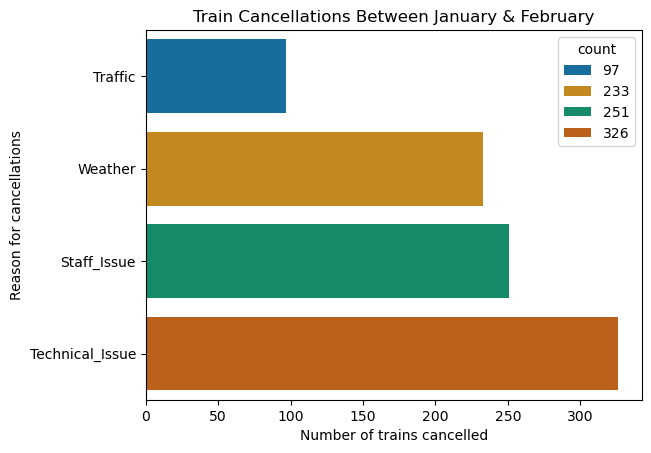

In [143]:
# Create a barplot to show the reasons for train cancellations in the months January and February 
sns.barplot(x=dfCancelJanFeb.values, 
            y=dfCancelJanFeb.index,
            hue=dfCancelJanFeb, 
            palette='colorblind')

plt.xlabel('Number of trains cancelled')
plt.ylabel('Reason for cancellations')
plt.title('Train Cancellations Between January & February')

savePlotFunction(14)

In [144]:
# Filter dfCancel to show April and May
dfCancelAprMay = dfCancel[(dfCancel['Date_of_Journey'] > '2024-02-29')]
dfCancelAprMay.head()

,Transaction_ID,Date_of_Purchase,Time_of_Purchase,Purchase_Type,Payment_Method,Railcard,Ticket_Class,Ticket_Type,Price,Departure_Station,Arrival_Destination,Date_of_Journey,Departure_Time,Arrival_Time,Actual_Arrival_Time,Journey_Status,Reason_for_Delay,Refund_Request
15849,3c285c7d-f820-4434-8dac,2024-03-01,20:15:27,Station,Contactless,None,Standard,Advance,35,London_Kings_Cross,York,2024-03-02,18:45:00,20:35:00,Train_Cancelled,Cancelled,Staff_Issue,0
15867,ce3f9f91-43fc-45e5-bf12,2024-03-02,00:46:04,Online,Credit_Card,None,Standard,Off-Peak,10,London_Euston,Birmingham_New_Street,2024-03-02,02:15:00,03:35:00,Train_Cancelled,Cancelled,Weather,1
15876,44474f2f-d88d-4e31-9182,2024-03-02,02:00:59,Online,Contactless,None,Standard,Off-Peak,53,London_Kings_Cross,York,2024-03-02,03:30:00,05:20:00,Train_Cancelled,Cancelled,Staff_Issue,1
15912,be888986-de95-4271-bd54,2024-03-02,05:53:20,Online,Contactless,Senior,Standard,Off-Peak,13,London_Paddington,Reading,2024-03-02,07:15:00,08:15:00,Train_Cancelled,Cancelled,Traffic,0
15939,7b37b509-d1eb-48f1-b065,2024-03-02,07:27:48,Online,Credit_Card,Adult,Standard,Off-Peak,2,Manchester_Piccadilly,Liverpool_Lime_Street,2024-03-02,08:45:00,09:15:00,Train_Cancelled,Cancelled,Traffic,1


In [145]:
dfCancelAprMay.tail()

,Transaction_ID,Date_of_Purchase,Time_of_Purchase,Purchase_Type,Payment_Method,Railcard,Ticket_Class,Ticket_Type,Price,Departure_Station,Arrival_Destination,Date_of_Journey,Departure_Time,Arrival_Time,Actual_Arrival_Time,Journey_Status,Reason_for_Delay,Refund_Request
31639,465e3643-fb67-4deb-8ec9,2024-04-30,17:13:32,Station,Debit_Card,Senior,First_Class,Anytime,144,London_Euston,Manchester_Piccadilly,2024-04-30,18:45:00,20:35:00,Train_Cancelled,Cancelled,Technical_Issue,0
31641,2e96cde6-50c1-4311-8089,2024-04-30,17:16:04,Station,Credit_Card,Adult,Standard,Anytime,95,London_Euston,Manchester_Piccadilly,2024-04-30,18:45:00,20:35:00,Train_Cancelled,Cancelled,Technical_Issue,1
31642,09e207d9-db49-4ec0-9c4f,2024-04-30,17:21:14,Online,Contactless,None,Standard,Anytime,5,Manchester_Piccadilly,Liverpool_Lime_Street,2024-04-30,18:45:00,19:15:00,Train_Cancelled,Cancelled,Weather,0
31644,1eacd955-f539-4c79-adb6,2024-04-30,17:26:33,Online,Credit_Card,None,Standard,Anytime,16,London_St_Pancras,Birmingham_New_Street,2024-04-30,18:45:00,20:05:00,Train_Cancelled,Cancelled,Technical_Issue,0
31645,a0e238b7-1ad1-4bf7-bd6c,2024-04-30,18:11:50,Online,Credit_Card,Senior,First_Class,Anytime,13,Manchester_Piccadilly,Liverpool_Lime_Street,2024-04-30,18:45:00,19:15:00,Train_Cancelled,Cancelled,Weather,0


In [146]:
# Count the reasons for cancellation and have them showing in ascending order
dfCancelAprMay = dfCancelAprMay['Reason_for_Delay'].value_counts()
dfCancelAprMay = dfCancelAprMay.sort_values(ascending=True)

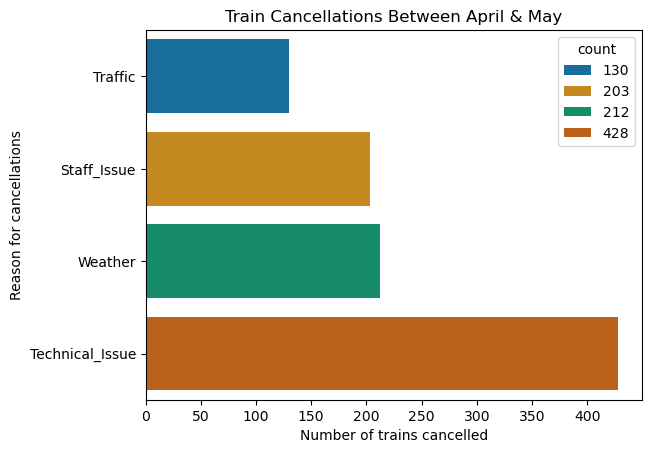

In [147]:
# Create barplot to show the reasons for train cancellations for April & May
sns.barplot(x=dfCancelAprMay.values,
            y=dfCancelAprMay.index,
            hue=dfCancelAprMay, 
            palette='colorblind')

plt.xlabel('Number of trains cancelled')
plt.ylabel('Reason for cancellations')
plt.title('Train Cancellations Between April & May')

savePlotFunction(15)

# End of notebook